In [ ]:
'''
The data include items, such as:

Accident : If traffic violation involved an accident.

Agency : Agency issuing the traffic violation. (Example: MCP is Montgomery County Police)

Alcohol : If the traffic violation included an alcohol related

Arrest Type : Type of Arrest (A = Marked, B = Unmarked, etc.)

Article : Article of State Law. (TA = Transportation Article, MR = Maryland Rules)

Belts : If traffic violation involved a seat belt violation.

Charge : Numeric code for the specific charge.

Color : Color of the vehicle.

Commercial License : If driver holds a Commercial Drivers License.

Commercial Vehicle : If the vehicle committing the traffic violation is a commercial vehicle.

Contributed To Accident : If the traffic violation was a contributing factor in an accident.

Date Of Stop : Date of the traffic violation.

Description : Text description of the specific charge.

DL State : State issuing the Driver’s License.

Driver City : City of the driver’s home address.

Driver State : State of the driver’s home address.

Fatal : If traffic violation involved a fatality.

Gender : Gender of the driver (F = Female, M = Male)

Geolocation : Geo-coded location information.

HAZMAT : If the traffic violation involved hazardous materials.

Latitude : Latitude location of the traffic violation.

Location : Location of the violation, usually an address or intersection.

Longitude : Longitude location of the traffic violation.

Make : Manufacturer of the vehicle (Examples: Ford, Chevy, Honda, Toyota, etc.)

Model : Model of the vehicle.

Personal Injury : If traffic violation involved Personal Injury.

Property Damage : If traffic violation involved Property Damage.

Race : Race of the driver. (Example: Asian, Black, White, Other, etc.)

State : State issuing the vehicle registration.

SubAgency : Court code representing the district of assignment of the officer. R15 = 1st district, Rockville B15 = 2nd
district, Bethesda SS15 = 3rd district, Silver Spring WG15 = 4th district, Wheaton G15 = 5th district, Germantown M15 = 6th district, Gaithersburg / Montgomery Village HQ15 = Headquarters and Special Operations

Time Of Stop : Time of the traffic violation.

VehicleType : Type of vehicle (Examples: Automobile, Station Wagon, Heavy Duty Truck, etc.)

Violation Type : Violation type. (Examples: Warning, Citation, SERO)

Work Zone : If the traffic violation was in a work zone.

Year : Year vehicle was made.
'''

'\nThe data include items, such as:\n\nAccident : If traffic violation involved an accident.\n\nAgency : Agency issuing the traffic violation. (Example: MCP is Montgomery County Police)\n\nAlcohol : If the traffic violation included an alcohol related\n\nArrest Type : Type of Arrest (A = Marked, B = Unmarked, etc.)\n\nArticle : Article of State Law. (TA = Transportation Article, MR = Maryland Rules)\n\nBelts : If traffic violation involved a seat belt violation.\n\nCharge : Numeric code for the specific charge.\n\nColor : Color of the vehicle.\n\nCommercial License : If driver holds a Commercial Drivers License.\n\nCommercial Vehicle : If the vehicle committing the traffic violation is a commercial vehicle.\n\nContributed To Accident : If the traffic violation was a contributing factor in an accident.\n\nDate Of Stop : Date of the traffic violation.\n\nDescription : Text description of the specific charge.\n\nDL State : State issuing the Driver’s License.\n\nDriver City : City of the d

In [4]:
!pip install seaborn
import pandas as pd
import random
import matplotlib.pyplot as plt

## DO NOT RUN THESE CELLS

In [ ]:
df=pd.read_csv('C:/Users/abhis/Downloads/Traffic_Violations.csv')
df.shape[0]

In [ ]:
df.head()

In [ ]:
!pip install sklearn


You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


In [ ]:
from sklearn import preprocessing
le1 = preprocessing.LabelEncoder()


"df['Gender'] =le1.fit_transform(df['Gender'])"

Checking the number of unique values and their count for the attributes of concern.

In [ ]:
import numpy as np
from sklearn import preprocessing
le1 = preprocessing.LabelEncoder()
attr=['Alcohol', 'Belts', 'Gender', 'Personal Injury', 'Property Damage', 'Fatal', 'Work Zone', 'Race', 'Model', 'VehicleType', 'Contributed To Accident', 'Color']
#df['VehicleType'] = le1.fit_transform(df['VehicleType'].astype(str))
#df['Make'] = le1.fit_transform(df['Make'].astype(str))


for i in attr:
    print(i, np.unique(df[str(i)].astype(str).to_numpy(), return_counts=True))

Alcohol (array(['No', 'Yes'], dtype=object), array([1290191,    2208], dtype=int64))
Belts (array(['No', 'Yes'], dtype=object), array([1247956,   44443], dtype=int64))
Gender (array(['F', 'M', 'U'], dtype=object), array([425097, 865862,   1440], dtype=int64))
Personal Injury (array(['No', 'Yes'], dtype=object), array([1277383,   15016], dtype=int64))
Property Damage (array(['No', 'Yes'], dtype=object), array([1267535,   24864], dtype=int64))
Fatal (array(['No', 'Yes'], dtype=object), array([1292120,     279], dtype=int64))
Work Zone (array(['No', 'Yes'], dtype=object), array([1292151,     248], dtype=int64))
Race (array(['ASIAN', 'BLACK', 'HISPANIC', 'NATIVE AMERICAN', 'OTHER', 'WHITE'],
      dtype=object), array([ 75454, 407493, 271966,   2940,  68738, 465808], dtype=int64))
Model (array(['(COMCAST)', '(SCION) TC', '(SW) PASSAT', ..., '`TSX 4D', 'nan',
       '~~4DR TL'], dtype=object), array([  1,   3,   2, ...,   1, 187,   2], dtype=int64))
VehicleType (array(['01 - Motorcycle', '0

In [ ]:
df = df.loc[(df['Alcohol'] != 'No') & (df['Belts'] != 'No')]

In [ ]:
df.shape

(79, 35)

In [ ]:
df1 = df.loc[(df['Alcohol'] == 'Yes') | (df['Belts'] == 'Yes')]

In [ ]:
df2 = df.loc[(df['Alcohol'] == 'No') & (df['Belts'] == 'No')]

In [ ]:
df1.shape

(46572, 35)

In [ ]:
df2.shape

(1245827, 35)

In [ ]:
df2.head()

,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,09/24/2013,17:11:00,MCP,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,8804 FLOWER AVE,NaN,NaN,No,No,...,13-401(h),Transportation Article,No,BLACK,M,TAKOMA PARK,MD,MD,A - Marked Patrol,NaN
1,08/29/2017,10:19:00,MCP,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WISCONSIN AVE@ ELM ST,38.981725,-77.092757,No,No,...,21-201(a1),Transportation Article,No,WHITE,F,FAIRFAX STATION,VA,VA,A - Marked Patrol,"(38.981725, -77.0927566666667)"
2,12/01/2014,12:52:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,No,No,...,21-403(b),Transportation Article,No,BLACK,F,UPPER MARLBORO,MD,MD,A - Marked Patrol,"(39.1628883333333, -77.2290883333333)"
3,08/29/2017,09:22:00,MCP,"3rd district, Silver Spring",FAILURE YIELD RIGHT OF WAY ON U TURN,CHERRY HILL RD./CALVERTON BLVD.,39.056975,-76.954633,No,No,...,21-402(b),Transportation Article,No,BLACK,M,FORT WASHINGTON,MD,MD,A - Marked Patrol,"(39.056975, -76.9546333333333)"
4,08/28/2017,23:41:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE OF DR. TO MAKE LANE CHANGE TO AVAIL. L...,355 @ SOUTH WESTLAND DRIVE,NaN,NaN,No,No,...,21-405(e1),Transportation Article,No,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,NaN


In [ ]:
df2 = pd.DataFrame(df2)

## 

In [ ]:
df3 

Date Of Stop                                                      01/03/2014
Time Of Stop                                                        22:29:00
Agency                                                                   MCP
SubAgency                                        3rd district, Silver Spring
Description                DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...
Location                                                      SPRING ST 2 29
Latitude                                                           39.001885
Longitude                                                         -77.024858
Accident                                                                  No
Belts                                                                     No
Personal Injury                                                           No
Property Damage                                                           No
Fatal                                                                     No

In [ ]:
dirty_df2 = df2.sample(frac=0.05)

In [ ]:
dirty_df2.shape

(62291, 35)

In [ ]:
dirty_final_data = pd.concat([df1,dirty_df2])

In [ ]:
dirty_final_data.sample(frac = 1)

,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
356729,04/23/2013,17:22:00,MCP,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,BEECH AVE @ LINDEN AVE.,39.012750,-77.107585,No,No,...,21-201(a1),Transportation Article,No,ASIAN,F,CENTREVILLE,VA,VA,L - Motorcycle,"(39.01275, -77.107585)"
762934,02/17/2015,20:30:00,MCP,"4th district, Wheaton",EXCEEDING THE POSTED SPEED LIMIT OF 40 MPH,CONNECTICUT AVE/ SPRUELL DR,39.047370,-77.075332,No,Yes,...,21-801.1,Transportation Article,No,WHITE,M,KENSINGTON,MD,MD,A - Marked Patrol,"(39.04737, -77.0753316666667)"
1118678,04/08/2014,10:54:00,MCP,"1st district, Rockville",FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...,DARNESTOWN RD / PRAIRIE LANDING WAY,39.101423,-77.216665,No,Yes,...,13-409(b),Transportation Article,No,WHITE,F,BOWIE,MD,MD,A - Marked Patrol,"(39.1014233333333, -77.216665)"
1150374,02/20/2013,19:54:00,MCP,"3rd district, Silver Spring",Stop Lights,COLUMBIA PIKE / MUSGROVE ROAD,39.069210,-76.958151,No,No,...,64*,NaN,No,BLACK,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.0692101166667, -76.95815075)"
361481,08/16/2013,09:49:00,MCP,"2nd district, Bethesda",EXCEEDING MAXIMUM SPEED: 52 MPH IN A POSTED 35...,W/B EAST WEST HWY @ GLENGALEN LN,38.991224,-77.069045,No,Yes,...,21-801.1,Transportation Article,No,BLACK,F,WASHINGTON,DC,DC,Q - Marked Laser,"(38.9912237333333, -77.0690451666667)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294522,12/12/2017,13:43:00,MCP,"1st district, Rockville",DRIVER WHEN TURNING LEFT FAIL TO YIELD RIGHT O...,192 HALPINE PLACE,39.060710,-77.125745,No,Yes,...,21-402(a),Transportation Article,No,HISPANIC,F,GAITHERSBURG,MD,MD,A - Marked Patrol,"(39.06071, -77.125745)"
889473,06/12/2013,20:32:00,MCP,"2nd district, Bethesda",Taillights,OLD GEORGETOWN RD / SOUTH DR,38.999707,-77.109377,No,Yes,...,56*,NaN,No,WHITE,M,BROOKEVILLE,MD,MD,A - Marked Patrol,"(38.9997066666667, -77.1093766666667)"
112992,01/05/2012,17:25:00,MCP,"6th district, Gaithersburg / Montgomery Village",DRIVER FAILURE TO STOP FOR PEDESTRIAN IN CROSS...,MCDONALD CHAPEL DR/ ORCHARD GROVE RD,39.122239,-77.256830,No,Yes,...,21-502(a2),Transportation Article,Yes,HISPANIC,M,N POTOMAC,MD,MD,A - Marked Patrol,"(39.12223925, -77.2568303833333)"
241377,02/05/2013,08:24:00,MCP,"4th district, Wheaton",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,14000 GEORGIA AVENUE (HOME DEPOT),39.092032,-77.079760,No,No,...,13-401(h),Transportation Article,No,BLACK,M,MONTGOMERY VILLAGE,MD,MD,A - Marked Patrol,"(39.0920323166667, -77.07976035)"


Importing the new data after performing dimensionality reduction on the original data.




In [5]:
#dirty_final_data.to_csv('C:/Users/abhis/Downloads/Final_Dirty_Traffic.csv')

finalDF=pd.read_csv('/content/sample_data/Final_Dirty_Traffic.csv')

In [6]:
import numpy as np
from sklearn import preprocessing
le1 = preprocessing.LabelEncoder()
attr=['Alcohol', 'Belts', 'Gender', 'Personal Injury', 'Property Damage', 'Fatal', 'Work Zone', 'Race', 'Model', 'VehicleType', 'Contributed To Accident', 'Color', 'Make']
#df['VehicleType'] = le1.fit_transform(df['VehicleType'].astype(str))
#df['Make'] = le1.fit_transform(df['Make'].astype(str))


for i in attr:
    print(i, np.unique(finalDF[str(i)].astype(str).to_numpy(), return_counts=True))

Alcohol (array(['No', 'Yes'], dtype=object), array([106655,   2208]))
Belts (array(['No', 'Yes'], dtype=object), array([64420, 44443]))
Gender (array(['F', 'M', 'U'], dtype=object), array([36932, 71857,    74]))
Personal Injury (array(['No', 'Yes'], dtype=object), array([105100,   3763]))
Property Damage (array(['No', 'Yes'], dtype=object), array([104227,   4636]))
Fatal (array(['No', 'Yes'], dtype=object), array([108832,     31]))
Work Zone (array(['No', 'Yes'], dtype=object), array([108835,     28]))
Race (array(['ASIAN', 'BLACK', 'HISPANIC', 'NATIVE AMERICAN', 'OTHER', 'WHITE'],
      dtype=object), array([ 6302, 32671, 23100,   224,  6066, 40500]))
Model (array(['-', '---', '.', ..., 'ZX10', 'ZX6R', 'nan'], dtype=object), array([ 1,  2,  3, ...,  1,  1, 32]))
VehicleType (array(['01 - Motorcycle', '02 - Automobile', '03 - Station Wagon',
       '04 - Limousine', '05 - Light Duty Truck', '06 - Heavy Duty Truck',
       '07 - Truck/Road Tractor', '08 - Recreational Vehicle',
       '

## Inconsistent Data

##'Make' feature in the dataset has alot of data discrepancy like spelling mistakes. These will be corrected below, using a similarity and autocorrect function.

In [7]:
dict_car_make = {}
for i in range(len(finalDF['Make'])):
  if(finalDF['Make'][i] not in dict_car_make):
    dict_car_make[finalDF['Make'][i]] =1 
  else:
    dict_car_make[finalDF['Make'][i]] +=1

In [8]:
dict_car_make

{',AZDA': 1,
 '----': 2,
 '00': 2,
 '1995': 5,
 '2005': 1,
 '2007': 1,
 '2008': 1,
 '4D': 1,
 '4S': 1,
 '7BE9868': 1,
 'ACCORD': 1,
 'ACCUR': 3,
 'ACCURA': 4,
 'ACRU': 2,
 'ACRUA': 1,
 'ACUARA': 1,
 'ACUR': 893,
 'ACUR G': 1,
 'ACURA': 2517,
 'ACURU': 1,
 'ACURVA': 1,
 'ACURVAL2003': 1,
 'ACYRA': 1,
 'ADILLAC': 1,
 'ADLY': 1,
 'ALFA ROMEO': 1,
 'ALTIMA': 1,
 'AM GENERAL': 1,
 'AMC': 25,
 'AMERICAN': 1,
 'APRI': 1,
 'APRILIA': 1,
 'ARISING': 1,
 'AST': 1,
 'ASTO': 1,
 'ASTON MARTIN': 3,
 'ATV': 1,
 'AUDDI': 1,
 'AUDI': 976,
 'AUDIVAL2011': 1,
 'AUDU': 1,
 'AUDUI': 1,
 'AURA': 1,
 'AVCURA': 1,
 'AVURA': 1,
 'BAJA': 1,
 'BASHAN': 2,
 'BEAMER': 1,
 'BENT': 2,
 'BENTLEY': 5,
 'BENTLY': 3,
 'BENZ': 6,
 'BICYCLE': 2,
 'BIGTEX': 1,
 'BLUE': 2,
 'BLUE BIRD': 3,
 'BMQ': 1,
 'BMW': 3231,
 'BMWVAL2003': 1,
 'BMX': 1,
 'BNW': 4,
 'BOMW': 1,
 'BOOM': 1,
 'BRI-MAR': 1,
 'BRIM': 2,
 'BRMA': 1,
 'BTEX': 1,
 'BUEL': 1,
 'BUELL': 3,
 'BUIC': 191,
 'BUICJ': 1,
 'BUICK': 582,
 'BUICK 4DR': 1,
 'BUIK': 2,
 

##This code checks for similarity between the car company in the database and the company mentioned in the dataset

In [9]:
def similarity(word1, word2):
    word1, word2 = word1.lower(), word2.lower()
    common = []
    bigram1, bigram2 = [word1[i]+word1[i+1] for i in range(len(word1)-1)], [word2[i]+word2[i+1] for i in range(len(word2)-1)]
    for i in range(len(bigram1)):
        try:
            cmn_elt = bigram2.index(bigram1[i])
            common.append(bigram1[i])
        except:
            continue
    return len(common)/max(len(bigram1), len(bigram2))

def autocorrect(word,Database, thres=0.2):
    max_sim=0.0
    most_sim=word
    for data in database:
        curr_sim=similarity(word, data)
        if curr_sim is not None and curr_sim > max_sim:
            max_sim=curr_sim
            most_sim= data
    return most_sim if max_sim>thres else word
database=['Acura','Aston Martin','Chrysler','Ducati','Datsun','Buell',
'Mercedes Benz','Audi','Bentley','BMW','Cadillac','Dodge','Ford',
'Harley','Honda','Hyundai','Infiniti','Lexus','Mitsubishi','Nissan','Porche','Subaru',
'Volkswagen','Accord','American','Mazda','Range Rover','Toyota','Am General','Aprilia',
'Kia','Yamaha','Lincoln','Workhorse','Volvo','Arising','Alpha Romero','Altima','WildFire',
'Western Star','Vespa','Vermeer','Beamer','Bashan','Blue Bird','Chester Built',
'Buick','Freight','Homemade','Hudson','Isuzu','Jaguar','Jeep','Kawasaki','Landrover',
'Mini','Pontiac','PTRB','Saturn','Suzuki','Taizhou','Truck','Chevrolet','HUYN','Ken','GMC','Fhr','Cehv']



In [10]:
dict_car_make

{',AZDA': 1,
 '----': 2,
 '00': 2,
 '1995': 5,
 '2005': 1,
 '2007': 1,
 '2008': 1,
 '4D': 1,
 '4S': 1,
 '7BE9868': 1,
 'ACCORD': 1,
 'ACCUR': 3,
 'ACCURA': 4,
 'ACRU': 2,
 'ACRUA': 1,
 'ACUARA': 1,
 'ACUR': 893,
 'ACUR G': 1,
 'ACURA': 2517,
 'ACURU': 1,
 'ACURVA': 1,
 'ACURVAL2003': 1,
 'ACYRA': 1,
 'ADILLAC': 1,
 'ADLY': 1,
 'ALFA ROMEO': 1,
 'ALTIMA': 1,
 'AM GENERAL': 1,
 'AMC': 25,
 'AMERICAN': 1,
 'APRI': 1,
 'APRILIA': 1,
 'ARISING': 1,
 'AST': 1,
 'ASTO': 1,
 'ASTON MARTIN': 3,
 'ATV': 1,
 'AUDDI': 1,
 'AUDI': 976,
 'AUDIVAL2011': 1,
 'AUDU': 1,
 'AUDUI': 1,
 'AURA': 1,
 'AVCURA': 1,
 'AVURA': 1,
 'BAJA': 1,
 'BASHAN': 2,
 'BEAMER': 1,
 'BENT': 2,
 'BENTLEY': 5,
 'BENTLY': 3,
 'BENZ': 6,
 'BICYCLE': 2,
 'BIGTEX': 1,
 'BLUE': 2,
 'BLUE BIRD': 3,
 'BMQ': 1,
 'BMW': 3231,
 'BMWVAL2003': 1,
 'BMX': 1,
 'BNW': 4,
 'BOMW': 1,
 'BOOM': 1,
 'BRI-MAR': 1,
 'BRIM': 2,
 'BRMA': 1,
 'BTEX': 1,
 'BUEL': 1,
 'BUELL': 3,
 'BUIC': 191,
 'BUICJ': 1,
 'BUICK': 582,
 'BUICK 4DR': 1,
 'BUIK': 2,
 

Calling autocorrect function

In [11]:

for i in range(len(finalDF['Make'])):
  finalDF['Make'][i] = autocorrect(str(finalDF['Make'][i]),database)

In [12]:





dict_car_make_corrected = {}
for i in range(len(finalDF['Make'])):
  if(finalDF['Make'][i] not in dict_car_make_corrected):
    dict_car_make_corrected[finalDF['Make'][i]] =1 
  else:
    dict_car_make_corrected[finalDF['Make'][i]] +=1

In [13]:
list(finalDF['Make'].unique())

['Dodge',
 'Honda',
 'Chevrolet',
 'Ford',
 'Toyota',
 'Chrysler',
 'Jeep',
 'Porche',
 'Buick',
 'Volvo',
 'Acura',
 'Hyundai',
 'BMW',
 'Mitsubishi',
 'Volkswagen',
 'Lexus',
 'Subaru',
 'Mazda',
 'Nissan',
 'Lincoln',
 'Infiniti',
 'Cadillac',
 'GMC',
 'Audi',
 'Beamer',
 'Kia',
 'Mercedes Benz',
 'Pontiac',
 'Hudson',
 'Landrover',
 'Isuzu',
 'PTRB',
 'Mini',
 'Am General',
 'SAAB',
 'PLYMOTH',
 'Saturn',
 'SCIO',
 'Freight',
 'PLYM',
 'Suzuki',
 'WildFire',
 'VW',
 'Range Rover',
 'Jaguar',
 'Arising',
 'Aprilia',
 'Blue Bird',
 'Homemade',
 'Yamaha',
 'Datsun',
 'Western Star',
 'Vermeer',
 'SAA',
 'PLYMOUTH',
 'Aston Martin',
 'OLDS MOBILE',
 'Bashan',
 'DAEWOO',
 'BWM',
 'AST',
 'KW',
 'Kawasaki',
 'Bentley',
 'American',
 'PETE',
 'Chester Built',
 'HUYN',
 'Ducati',
 'Cehv',
 'KA',
 'CAAB',
 'Ken',
 'Vespa',
 'BNW',
 'MREZ',
 '2005',
 '1995',
 'MUSTANG',
 'NFLY',
 'CARG',
 'MEZ',
 'SMRT',
 'CARR',
 'Harley',
 'CRCA',
 'GRUMMAN',
 'MG',
 'FERR',
 'FPHT',
 'CHYRS',
 'FANGYUE',


In [14]:
dict_car_make_corrected

{'----': 2,
 '00': 2,
 '1995': 5,
 '2005': 1,
 '2007': 1,
 '2008': 1,
 '4D': 1,
 '4S': 1,
 '7BE9868': 1,
 'ADLY': 1,
 'AST': 1,
 'ATV': 1,
 'Accord': 2,
 'Acura': 3980,
 'Alpha Romero': 1,
 'Altima': 3,
 'Am General': 14,
 'American': 16,
 'Aprilia': 14,
 'Arising': 8,
 'Aston Martin': 109,
 'Audi': 1001,
 'BAJA': 1,
 'BICYCLE': 2,
 'BIGTEX': 1,
 'BMW': 3236,
 'BNW': 4,
 'BOOM': 1,
 'BRIM': 2,
 'BUYANG': 1,
 'BW': 2,
 'BWI': 1,
 'BWM': 8,
 'Bashan': 7,
 'Beamer': 1956,
 'Bentley': 81,
 'Blue Bird': 5,
 'Buell': 8,
 'Buick': 778,
 'C300': 1,
 'CAAB': 1,
 'CAI': 1,
 'CALI': 1,
 'CARG': 1,
 'CARR': 4,
 'CARY': 2,
 'CHY': 1,
 'CHYRS': 1,
 'COPPER': 1,
 'COTC': 1,
 'CRCA': 3,
 'CRY': 3,
 'Cadillac': 991,
 'Cehv': 12,
 'Chester Built': 45,
 'Chevrolet': 2738,
 'Chrysler': 1749,
 'DAEWOO': 9,
 'Datsun': 8,
 'Dodge': 3739,
 'Ducati': 21,
 'EAGL': 1,
 'EASY': 1,
 'FANGYUE': 1,
 'FED EX TK': 1,
 'FERR': 3,
 'FPHT': 1,
 'FRH': 1,
 'FRIE': 1,
 'FRTL': 1,
 'Fhr': 3,
 'Ford': 10300,
 'Freight': 108,

In [15]:





list_of_useless_cars = []
for keys,values in dict_car_make_corrected.items():
    if values < 11:
        list_of_useless_cars.append(str(keys))
        

In [16]:


list_of_useless_cars

['Hudson',
 'Arising',
 'Blue Bird',
 'Datsun',
 'OLDS MOBILE',
 'Bashan',
 'DAEWOO',
 'BWM',
 'AST',
 'KA',
 'CAAB',
 'BNW',
 'MREZ',
 '2005',
 '1995',
 'MUSTANG',
 'NFLY',
 'CARG',
 'MEZ',
 'SMRT',
 'CARR',
 'CRCA',
 'GRUMMAN',
 'MG',
 'FERR',
 'FPHT',
 'CHYRS',
 'FANGYUE',
 '----',
 'Fhr',
 'LOTU',
 'MB',
 'FED EX TK',
 'VIP',
 'UNK',
 'XX',
 '00',
 'YB50',
 'Buell',
 'PEUG',
 'CARY',
 'TOWN',
 'PREM',
 'RIDEON',
 'Taizhou',
 'GNC',
 'nan',
 'UNKNOWN',
 'Truck',
 'BIGTEX',
 'KEEWAY',
 'BRIM',
 'ZHNG',
 'Accord',
 'MCELRATH',
 'Workhorse',
 'UTIL',
 'PYLMOUTH',
 'JONWAY',
 'VK',
 'BICYCLE',
 'TOPB',
 '2008',
 'TOUT',
 'TOYT / SCION',
 'MONGOOSE',
 'PNT',
 'TAO',
 'SHELBY REPL',
 'ZHEJIANG',
 'COTC',
 'HD',
 'CHY',
 'ATV',
 'Altima',
 'STS',
 'IHC',
 'WV',
 'T0Y0TA',
 'TOP',
 'BAJA',
 'SAB',
 'PHB',
 'BUYANG',
 'TOYT (SCION)',
 'SSR',
 'TOWMQ',
 'EASY',
 '7BE9868',
 'KAUFMAN',
 'FRTL',
 'PSD',
 'MRZ',
 'Alpha Romero',
 'VPG',
 'TPYPTA',
 'LB50',
 'VILK',
 'PLY',
 'ROAD',
 '4D',
 'HUMA

In [17]:




import numpy as np
for i in range(len(finalDF['Make'])):
  if(finalDF['Make'][i] in list_of_useless_cars):
    finalDF['Make'][i] = np.nan

In [18]:
finalDF.shape

(108863, 36)

In [19]:
finalDF.isna().sum()

Unnamed: 0                    0
Date Of Stop                  0
Time Of Stop                  0
Agency                        0
SubAgency                     0
Description                   0
Location                      0
Latitude                   7607
Longitude                  7607
Accident                      0
Belts                         0
Personal Injury               0
Property Damage               0
Fatal                         0
Commercial License            0
HAZMAT                        0
Commercial Vehicle            0
Alcohol                       0
Work Zone                     0
State                         5
VehicleType                   0
Year                        447
Make                        253
Model                        32
Color                      1106
Violation Type                0
Charge                        0
Article                    4945
Contributed To Accident       0
Race                          0
Gender                        0
Driver C

##Treating Missing Values
As Values in Latitude and Longitude features along with Geolocation cannot be interpreted using any method like filling it by mean, median or mode, we drop the NaN values in these columns

In [20]:
finalDF_cleaned=finalDF.drop(columns='Latitude')
finalDF_cleaned=finalDF_cleaned.drop(columns='Longitude')
finalDF_cleaned=finalDF_cleaned.drop(columns='Geolocation')

finalDF_cleaned.isna().sum()


Unnamed: 0                    0
Date Of Stop                  0
Time Of Stop                  0
Agency                        0
SubAgency                     0
Description                   0
Location                      0
Accident                      0
Belts                         0
Personal Injury               0
Property Damage               0
Fatal                         0
Commercial License            0
HAZMAT                        0
Commercial Vehicle            0
Alcohol                       0
Work Zone                     0
State                         5
VehicleType                   0
Year                        447
Make                        253
Model                        32
Color                      1106
Violation Type                0
Charge                        0
Article                    4945
Contributed To Accident       0
Race                          0
Gender                        0
Driver City                  25
Driver State                  1
DL State

In [21]:

finalDF_cleaned.iloc[:, [17,19,20,21,22,25,29,30,31]]

,State,Year,Make,Model,Color,Article,Driver City,Driver State,DL State
0,MD,2009.0,Dodge,CHARGER,BLACK,Transportation Article,SILVER SPRING,MD,MD
1,MD,1999.0,Honda,2S,BLACK,Transportation Article,OLNEY,MD,MD
2,VA,1998.0,Chevrolet,CAVALIER,GOLD,Transportation Article,TAKOMA PARK,MD,MD
3,DC,2005.0,Ford,CROWN VIC,BLACK,Transportation Article,WASHINGTON,DC,DC
4,MD,2007.0,Toyota,YARIS,BLACK,Transportation Article,SILVER SPRING,MD,DC
...,...,...,...,...,...,...,...,...,...
108858,MD,2011.0,BMW,4DR,BLACK,Transportation Article,SILVER SPRING,MD,MD
108859,MD,2016.0,Chrysler,4 DOOR,BLACK,Transportation Article,MONTGOMERY VILLAGE,MD,MD
108860,MD,1995.0,Toyota,CAMRY,GOLD,Transportation Article,SILVER SPRING,MD,MD
108861,MD,2003.0,Beamer,CLK430,BEIGE,Transportation Article,MONTGOMERY VILLAGE,MD,MD


## Treating Missing Values

In [22]:



from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(finalDF_cleaned.iloc[:, [17,20,21,22,25,29,30,31]].values)
finalDF_cleaned.iloc[:, [17,20,21,22,25,29,30,31]] = imputer.transform(finalDF_cleaned.iloc[:, [17,20,21,22,25,29,30,31]].values)

In [23]:

finalDF_cleaned['Year'].fillna(int(finalDF_cleaned['Year'].mean()))
finalDF_cleaned = finalDF_cleaned.dropna(axis=0)

Cleaned dataset.

In [24]:





finalDF_cleaned.isna().sum()

Unnamed: 0                 0
Date Of Stop               0
Time Of Stop               0
Agency                     0
SubAgency                  0
Description                0
Location                   0
Accident                   0
Belts                      0
Personal Injury            0
Property Damage            0
Fatal                      0
Commercial License         0
HAZMAT                     0
Commercial Vehicle         0
Alcohol                    0
Work Zone                  0
State                      0
VehicleType                0
Year                       0
Make                       0
Model                      0
Color                      0
Violation Type             0
Charge                     0
Article                    0
Contributed To Accident    0
Race                       0
Gender                     0
Driver City                0
Driver State               0
DL State                   0
Arrest Type                0
dtype: int64

In [25]:
from sklearn.preprocessing import LabelEncoder
labenc=LabelEncoder()
finalDF_cleaned.iloc[:,8]=labenc.fit_transform(finalDF_cleaned.iloc[:,8].values)
finalDF_cleaned.iloc[:,15]=labenc.fit_transform(finalDF_cleaned.iloc[:,15].values)

Visualization using bar plots between :
Alcohol vs Personal Injury,
Alcohol vs Property Damage,
Alcohol vs Gender,
Alcohol vs Race,
Belts vs Personal Injury, 
Belts vs Property Damage,
Belts vs Gender,
Belts vs Race,

<function matplotlib.pyplot.tight_layout>

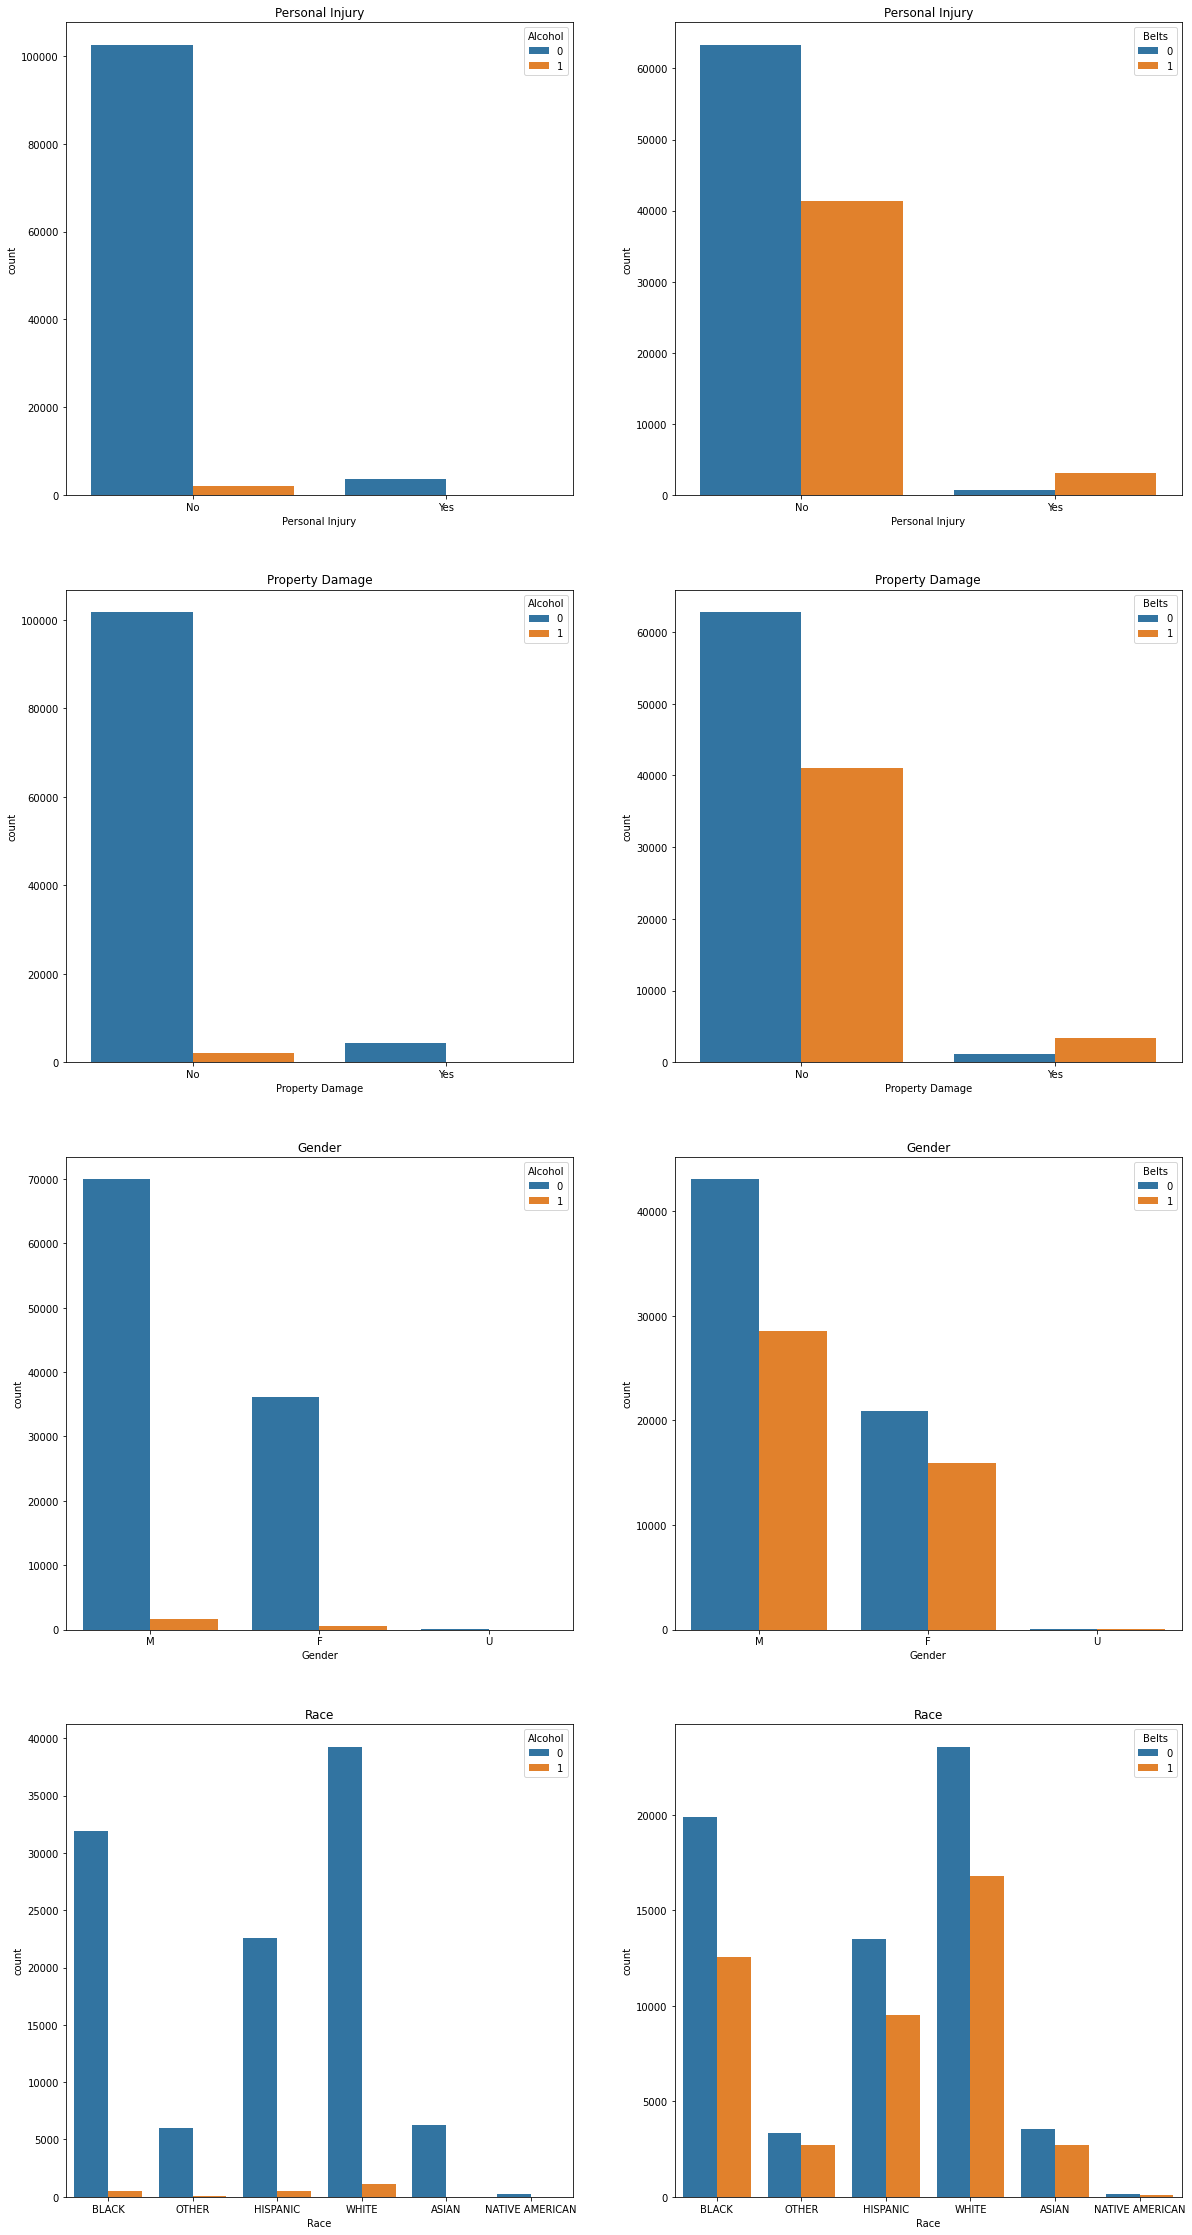

In [26]:


#viz
import matplotlib.pyplot as plt
import seaborn as sns
x=['Personal Injury','Property Damage', 'Gender', 'Race']
y=['Alcohol', 'Belts']
fig, axs = plt.subplots(4, 2, figsize=(20,40))
for i in range(0, len(x)):
  for j in range(0, len(y)):
    sns.countplot(finalDF_cleaned[x[i]], hue=finalDF_cleaned[y[j]], ax=axs[i][j])
    axs[i][j].set_title(x[i])
    axs[i][j].legend(title=y[j], loc='upper right')


plt.tight_layout

##Number of Violations during the years.

*   1975-2021

We have taken the year starting from 1975 as there hardly any data available for the years prior to 1975 and also to make sure no other ouliers are present in the chart.

(array([2.6000e+01, 6.7000e+01, 5.0900e+02, 2.7300e+03, 1.1854e+04,
        2.7742e+04, 3.0668e+04, 2.7630e+04, 7.0010e+03]),
 array([1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020]),
 <a list of 9 Patch objects>)

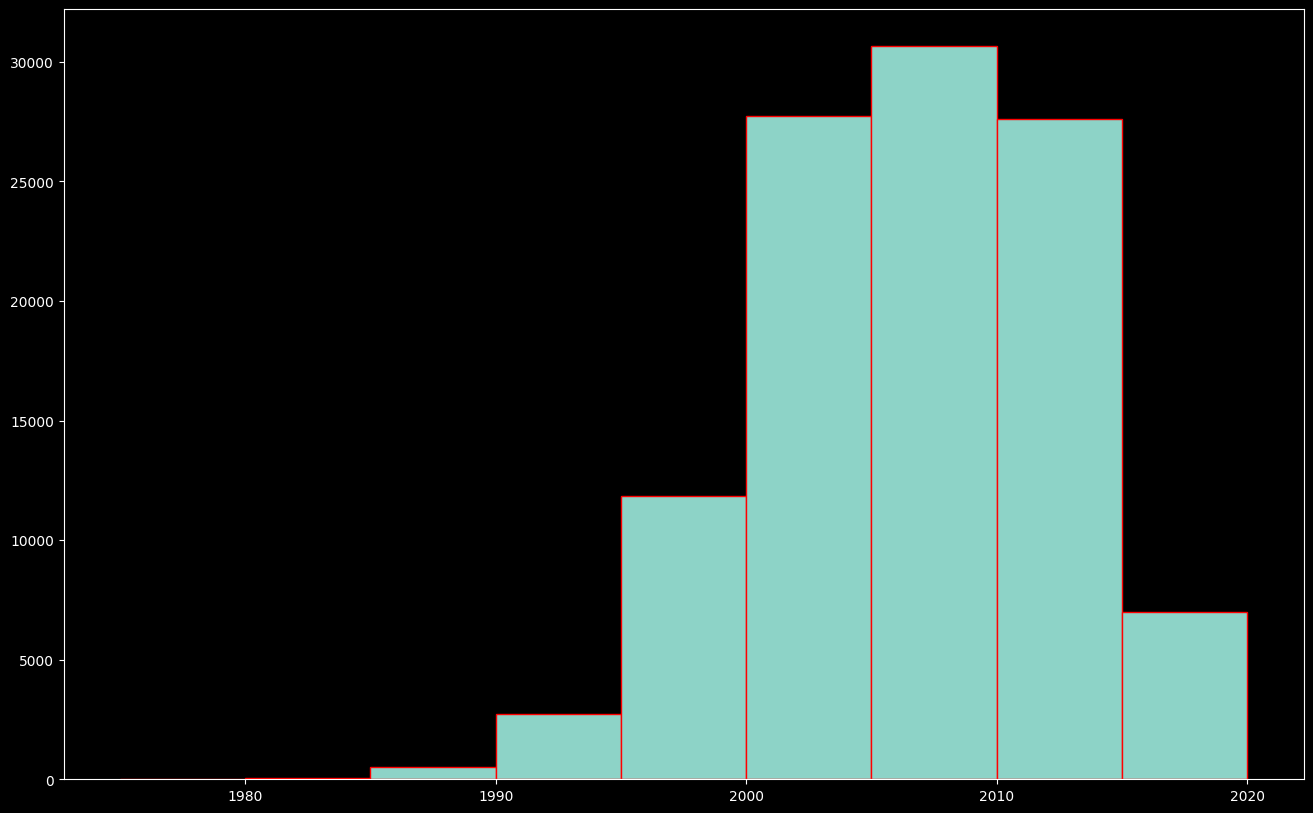

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(16, 10))
bins_list = [1975,1980,1985,1990,1995,2000,2005,2010,2015,2020]
plt.hist(finalDF_cleaned['Year'], edgecolor="red", bins=bins_list)

Visualizing the number of belt wearers for each race.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


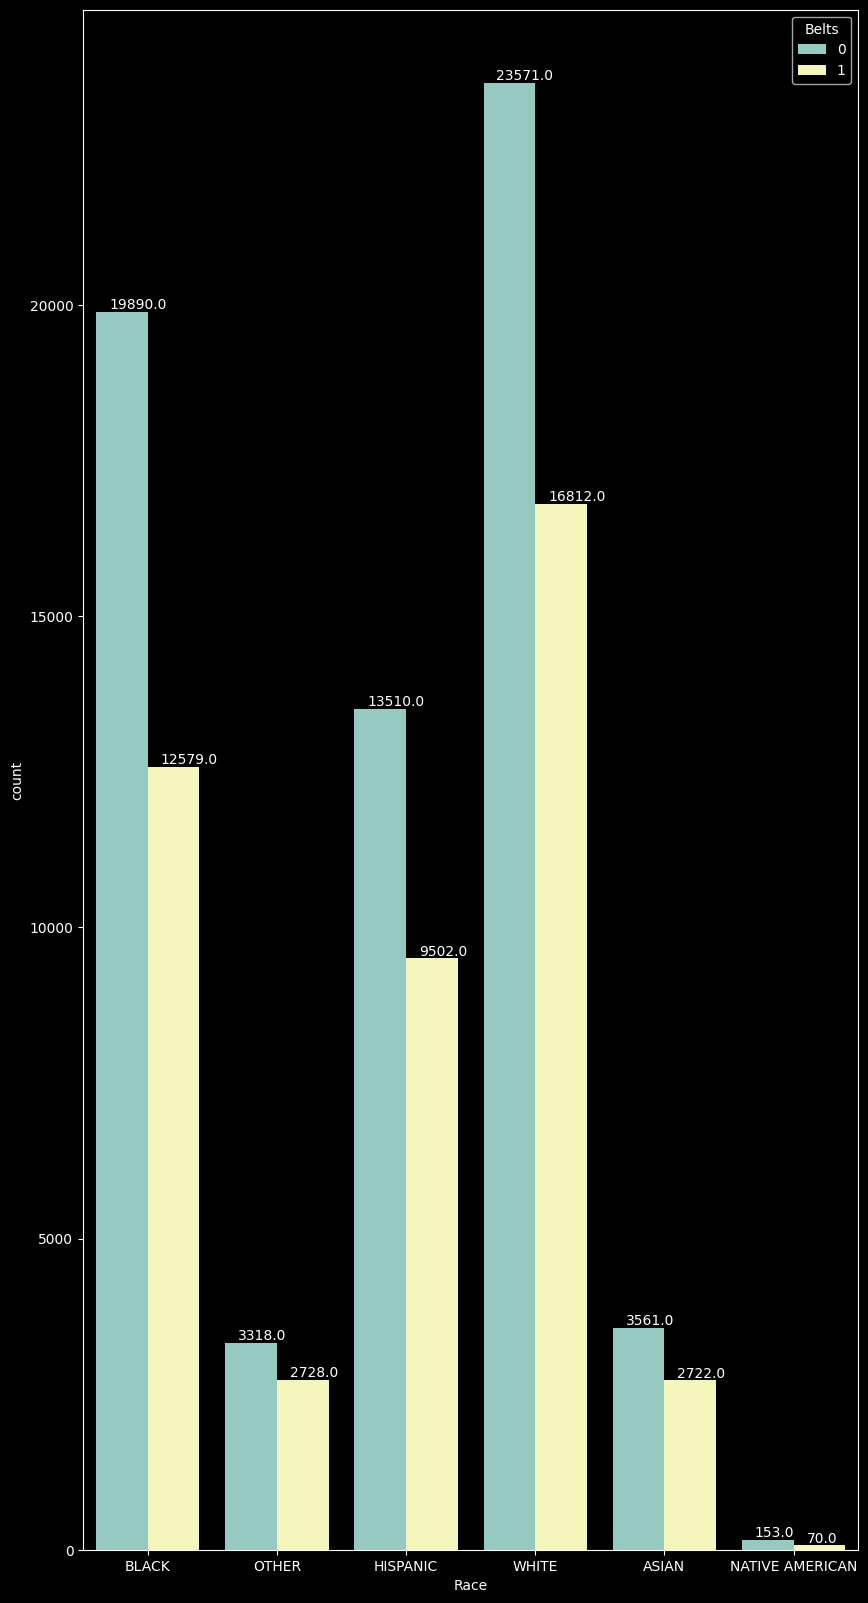

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(10,20))
ax1=sns.countplot(finalDF_cleaned['Race'], hue=finalDF_cleaned['Belts'])
for p in ax1.patches:
  ax1.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [ ]:
!pip install pyecharts

Calculating the ratio of belt wearers for each race and visualizing the same using coxcomb chart.

In [ ]:
c = ['Black', 'Other', 'Hispanic', 'White', 'Asian', 'Native American']
d = [12579/19890, 2728/3318, 9502/13510, 16812/23571, 2722/3561, 70/153]
df=[c, d]
df=pd.DataFrame(df)

df.head(5)

,0,1,2,3,4,5
0,Black,Other,Hispanic,White,Asian,Native American
1,0.632428,0.822182,0.703331,0.713249,0.764392,0.457516


In [ ]:
from pyecharts.charts import Pie
from pyecharts import options as opts
c = ['Black', 'Other', 'Hispanic', 'White', 'Asian', 'Native American']
d = [12579/19890, 2728/3318, 9502/13510, 16812/23571, 2722/3561, 70/153]

color_series = [ '#802200’,’#B33000','#FF4500','#FAA327','#9ECB3C', '#44388E']
rosechart = Pie(init_opts=opts.InitOpts(width='1350px', height='750px'))

rosechart.set_colors(color_series)

rosechart.add("", [list(z) for z in zip(c, d)],radius=["20%", "95%"], center=["30%", "60%"], rosetype="area")

rosechart.set_global_opts(title_opts=opts.TitleOpts(title='Coxcomb of Belt wearers in each Race',subtitle=""),legend_opts=opts.LegendOpts(is_show=False),
toolbox_opts=opts.ToolboxOpts())

rosechart.set_series_opts(label_opts=opts.LabelOpts(is_show=True, position="inside", font_size=12,formatter="{b}:{c}%", font_style="italic",font_weight="bold", font_family="Century"),)
print(rosechart.render())

import IPython
IPython.display.HTML(filename=rosechart.render())

/content/render.html


Since, there are very few records for the some of the car makers, we are considering only the car makers which has atleast 1000 records. 

In [ ]:


s=np.unique(finalDF_cleaned['Make'].astype(str).to_numpy(), return_counts=True)

a={}

for i in range(len(s[0])):
  if(s[1][i]>=1000):
    #print(s[0][i], s[1][i])
    a[s[0][i]]=s[1][i]
len(a)

23

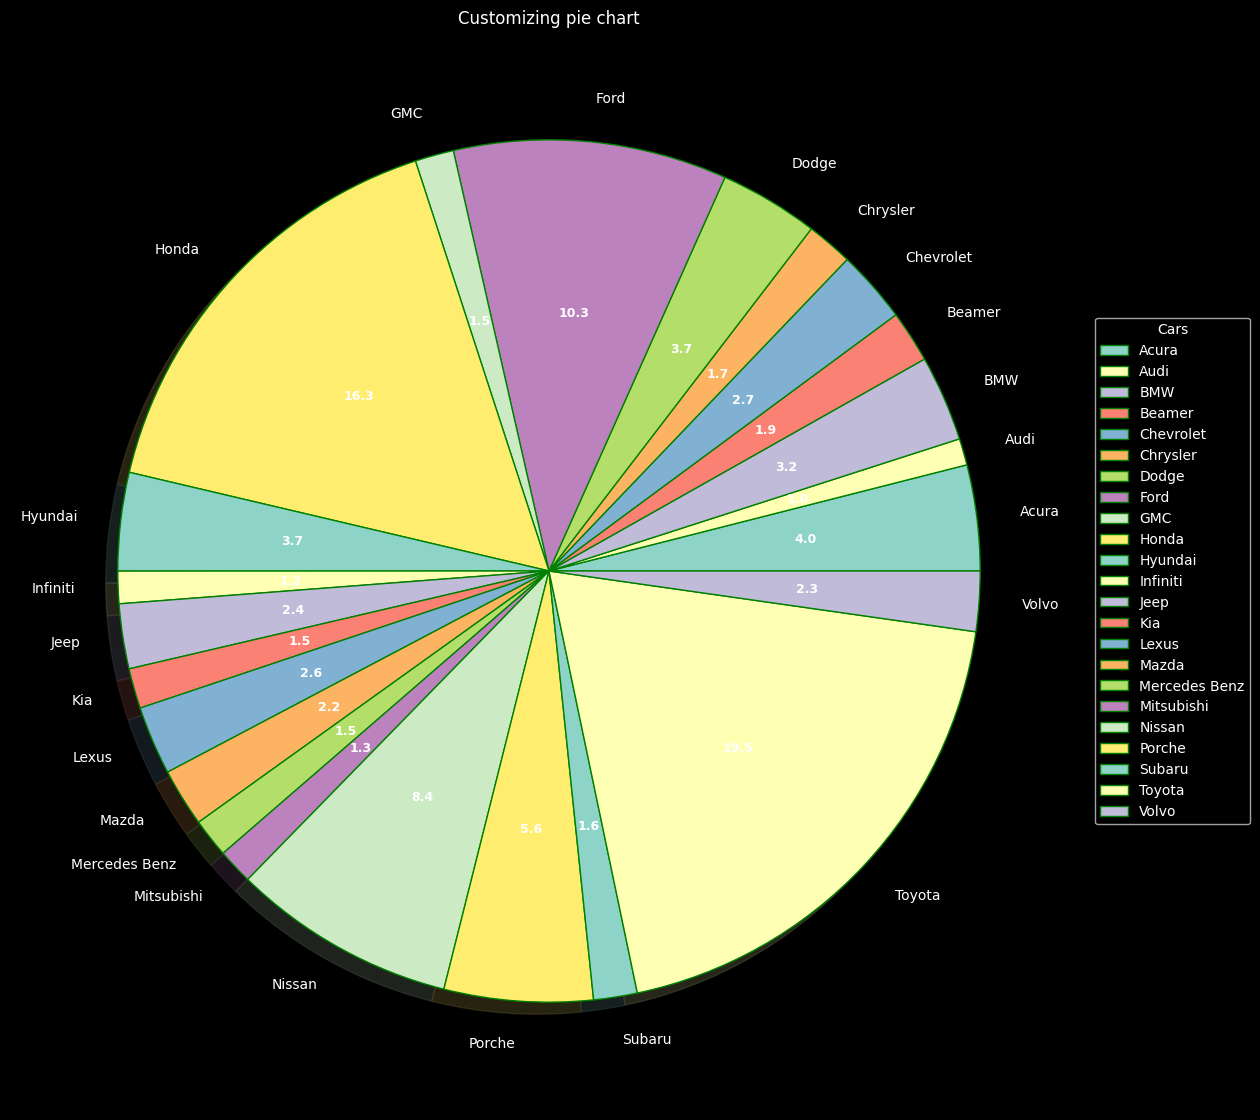

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Creating dataset
names=list(a.keys())
vals=list(a.values())


# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

# Creating autocpt arguments
def func(pct, allvalues):
	absolute = int(pct)
	return "{:.1f}".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(20, 14))
wedges, texts, autotexts = ax.pie(a.values(),
								autopct = lambda pct: func(pct, vals),
								labels = a.keys(),
								shadow = True,
								wedgeprops = wp,
								)

# Adding legend
ax.legend(wedges, names,
		title ="Cars",
		loc ="center left",
		bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size = 9, weight ="bold")
ax.set_title("Customizing pie chart")

# show plot
plt.show()


In [ ]:




np.unique(finalDF_cleaned['Arrest Type'].astype(str).to_numpy(), return_counts=True)

(array(['A - Marked Patrol', 'B - Unmarked Patrol', 'C - Marked VASCAR',
        'D - Unmarked VASCAR', 'E - Marked Stationary Radar',
        'F - Unmarked Stationary Radar',
        'G - Marked Moving Radar (Stationary)',
        'H - Unmarked Moving Radar (Stationary)',
        'I - Marked Moving Radar (Moving)',
        'J - Unmarked Moving Radar (Moving)', 'K - Aircraft Assist',
        'L - Motorcycle', 'M - Marked (Off-Duty)',
        'N - Unmarked (Off-Duty)', 'O - Foot Patrol', 'P - Mounted Patrol',
        'Q - Marked Laser', 'R - Unmarked Laser',
        'S - License Plate Recognition'], dtype=object),
 array([81030,  4201,    30,     9,   749,    55,   954,    40,   412,
           20,     4,  1493,   135,    21,   780,    23, 13582,  2306,
         2572]))

Visualizing Race vs Arrest type using bar plots. We can see from the plot that a very ratio of arrests have happened through a Marked Patrol.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


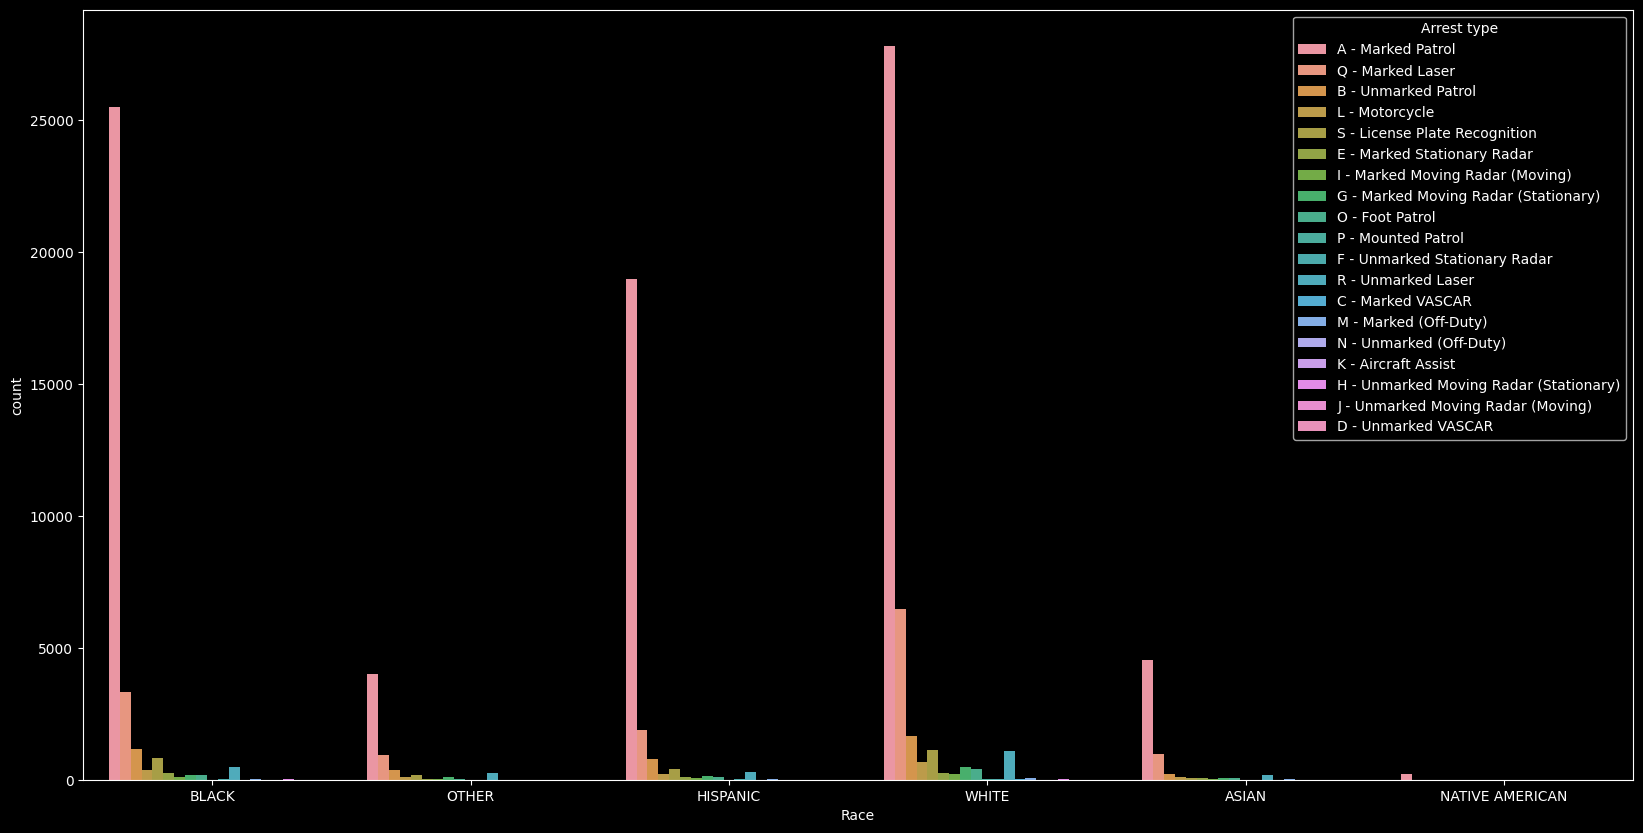

In [ ]:


fig, axs = plt.subplots(1, 1, figsize=(20,10))
sns.countplot(finalDF_cleaned['Race'], hue=finalDF_cleaned['Arrest Type'], ax=axs)
axs.legend(title='Arrest type', loc='upper right')

In [27]:



np.unique(finalDF_cleaned['Make'].astype(str).to_numpy(), return_counts=True)

(array(['Acura', 'Am General', 'American', 'Aprilia', 'Aston Martin',
        'Audi', 'BMW', 'Beamer', 'Bentley', 'Buick', 'Cadillac', 'Cehv',
        'Chester Built', 'Chevrolet', 'Chrysler', 'Dodge', 'Ducati',
        'Ford', 'Freight', 'GMC', 'HUYN', 'Harley', 'Homemade', 'Honda',
        'Hyundai', 'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'KW', 'Kawasaki',
        'Ken', 'Kia', 'Landrover', 'Lexus', 'Lincoln', 'Mazda',
        'Mercedes Benz', 'Mini', 'Mitsubishi', 'Nissan', 'PETE', 'PLYM',
        'PLYMOTH', 'PLYMOUTH', 'PTRB', 'Pontiac', 'Porche', 'Range Rover',
        'SAA', 'SAAB', 'SCIO', 'Saturn', 'Subaru', 'Suzuki', 'Toyota',
        'VW', 'Vermeer', 'Vespa', 'Volkswagen', 'Volvo', 'Western Star',
        'WildFire', 'Yamaha'], dtype=object),
 array([ 3980,    14,    16,    14,   109,  1001,  3236,  1956,    81,
          778,   991,    12,    45,  2738,  1749,  3739,    21, 10300,
          108,  1457,    28,    24,    39, 16389,  3697,  1217,   424,
          220,  2443,   


Filtering the records that indicate personal injury, in order to visualize the personal safety againt the car makers.

In [28]:
finalDF_cleaned.iloc[:,9]=labenc.fit_transform(finalDF_cleaned.iloc[:,9].values)
filtered_df = finalDF_cleaned.loc[(finalDF_cleaned['Personal Injury'] == 1)]
filtered_df

,Unnamed: 0,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,State,VehicleType,Year,Make,Model,Color,Violation Type,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type
5,219,09/09/2015,10:08:00,MCP,"1st district, Rockville",FAILURE TO RETURN TO & REMAIN AT SCENE OF ACCI...,FALLS RD / MONTROSE RD,No,1,1,No,No,No,No,No,0,No,MD,02 - Automobile,2009.0,Chrysler,SEBRING,WHITE,Citation,20-103(b),Transportation Article,No,WHITE,M,ROCKVILLE,MD,MD,A - Marked Patrol
11,676,05/26/2014,08:38:00,MCP,"4th district, Wheaton",DRIVING VEHICLE ON HIGHWAY WITHOUT CURRENT REG...,NEW HAMPSHIRE AVE. @ TREE LAWN DR,No,1,1,No,No,No,No,No,0,No,MD,02 - Automobile,2006.0,Porche,SU,BLACK,Citation,13-411(d),Transportation Article,No,WHITE,M,SILVER SPRING,MD,MD,A - Marked Patrol
13,734,09/09/2015,10:08:00,MCP,"1st district, Rockville",FAILURE OF DRIVER INVOLVED IN ACCIDENT TO REND...,FALLS RD / MONTROSE RD,No,1,1,No,No,No,No,No,0,No,MD,02 - Automobile,2009.0,Chrysler,SEBRING,WHITE,Citation,20-104(a),Transportation Article,No,WHITE,M,ROCKVILLE,MD,MD,A - Marked Patrol
15,1121,07/31/2012,14:08:00,MCP,"4th district, Wheaton",DRIVER CHANGING LANES WHEN UNSAFE,RT 108 / SPARTAN,No,1,1,No,No,No,No,No,0,No,MD,02 - Automobile,2007.0,Dodge,4H,BLACK,Citation,21-309(b),Transportation Article,Yes,WHITE,F,FAIRMOUNT HEIGHTS,MD,MD,A - Marked Patrol
20,1263,09/09/2015,10:08:00,MCP,"1st district, Rockville",FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...,FALLS RD / MONTROSE RD,No,1,1,No,No,No,No,No,0,No,MD,02 - Automobile,2009.0,Chrysler,SEBRING,WHITE,Citation,13-409(b),Transportation Article,No,WHITE,M,ROCKVILLE,MD,MD,A - Marked Patrol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108346,1166247,11/30/2013,14:01:00,MCP,"4th district, Wheaton",POSSESSING SUSPENDED LIC.,CONNECTICUT AVE AT ASPEN HILL RD,No,0,1,No,No,No,No,No,0,No,MD,02 - Automobile,2004.0,Hyundai,XG350,BLACK,Citation,16-301(j),Transportation Article,No,HISPANIC,M,ROCKVILLE,MD,MD,A - Marked Patrol
108535,188780,09/13/2015,19:32:00,MCP,"4th district, Wheaton",DRIVING VEH. WHILE SO FAR IMPAIRED BY ALCOHOL ...,EMORY LN WB / MUNCASTER MILL RD,No,0,1,No,No,No,No,No,0,No,MD,02 - Automobile,2015.0,Chrysler,200,BLUE,Citation,21-902(c1),Transportation Article,Yes,WHITE,F,KENSINGTON,MD,MD,A - Marked Patrol
108545,219602,09/27/2015,11:28:00,MCP,"4th district, Wheaton",DRIVING VEHICLE IN EXCESS OF REASONABLE AND PR...,GEORGIA AVE / PARKER AVE,No,0,1,No,No,No,No,No,0,No,MD,02 - Automobile,2012.0,Toyota,RAV4,BLACK,Citation,21-801(a),Transportation Article,Yes,BLACK,F,HYATTSVILLE,MD,MD,A - Marked Patrol
108596,118572,04/30/2013,22:58:00,MCP,"5th district, Germantown",FAILURE TO CONTROL VEHICLE SPEED ON HIGHWAY TO...,CLOPPER RD@GERMANTOWN RD,No,0,1,No,No,No,No,No,0,No,TN,02 - Automobile,2002.0,Chevrolet,SILVERADO,RED,Citation,21-801(b),Transportation Article,Yes,HISPANIC,M,GERMANTOWN,MD,MD,A - Marked Patrol


Calculating the ratio of personal injury to the total number of traffic violations for each car maker. 

In [29]:

makevsinj=np.unique(filtered_df['Make'].astype(str).to_numpy(), return_counts=True)
makevsallinj=np.unique(finalDF_cleaned['Make'].astype(str).to_numpy(), return_counts=True)
mylist=[]

for i in range(len(makevsinj[0])):
  for j in range(len(makevsallinj[0])):
    if(makevsinj[0][i] == makevsallinj[0][j]):
      mylist.append([makevsinj[1][i]/makevsallinj[1][j], makevsinj[0][i]])
      break
mylist = np.array(mylist)
mylist

array([['0.0407035175879397', 'Acura'],
       ['0.07142857142857142', 'Am General'],
       ['0.07142857142857142', 'Aprilia'],
       ['0.06422018348623854', 'Aston Martin'],
       ['0.03596403596403597', 'Audi'],
       ['0.02904820766378245', 'BMW'],
       ['0.03374233128834356', 'Beamer'],
       ['0.04938271604938271', 'Bentley'],
       ['0.019280205655526992', 'Buick'],
       ['0.03632694248234107', 'Cadillac'],
       ['0.17777777777777778', 'Chester Built'],
       ['0.03688823959094229', 'Chevrolet'],
       ['0.044596912521440824', 'Chrysler'],
       ['0.03289649638940893', 'Dodge'],
       ['0.03796116504854369', 'Ford'],
       ['0.046296296296296294', 'Freight'],
       ['0.03980782429649966', 'GMC'],
       ['0.05128205128205128', 'Homemade'],
       ['0.037464152785404846', 'Honda'],
       ['0.03354070868271571', 'Hyundai'],
       ['0.013968775677896467', 'Infiniti'],
       ['0.04245283018867924', 'Isuzu'],
       ['0.013636363636363636', 'Jaguar'],
       ['0.0

-0.4
0.6000000000000001
1.6
2.5999999999999996
3.5999999999999996
4.6
5.6
6.6
7.6
8.600000000000001
9.600000000000001
10.600000000000001
11.600000000000001
12.600000000000001
13.600000000000001
14.600000000000001
15.600000000000001
16.6
17.6
18.6
19.6
20.6
21.6
22.6
23.6
-2.7755575615628914e-17
0.9999999999999999
2.0
3.0
4.0
5.0
6.0
7.0
7.999999999999999
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0


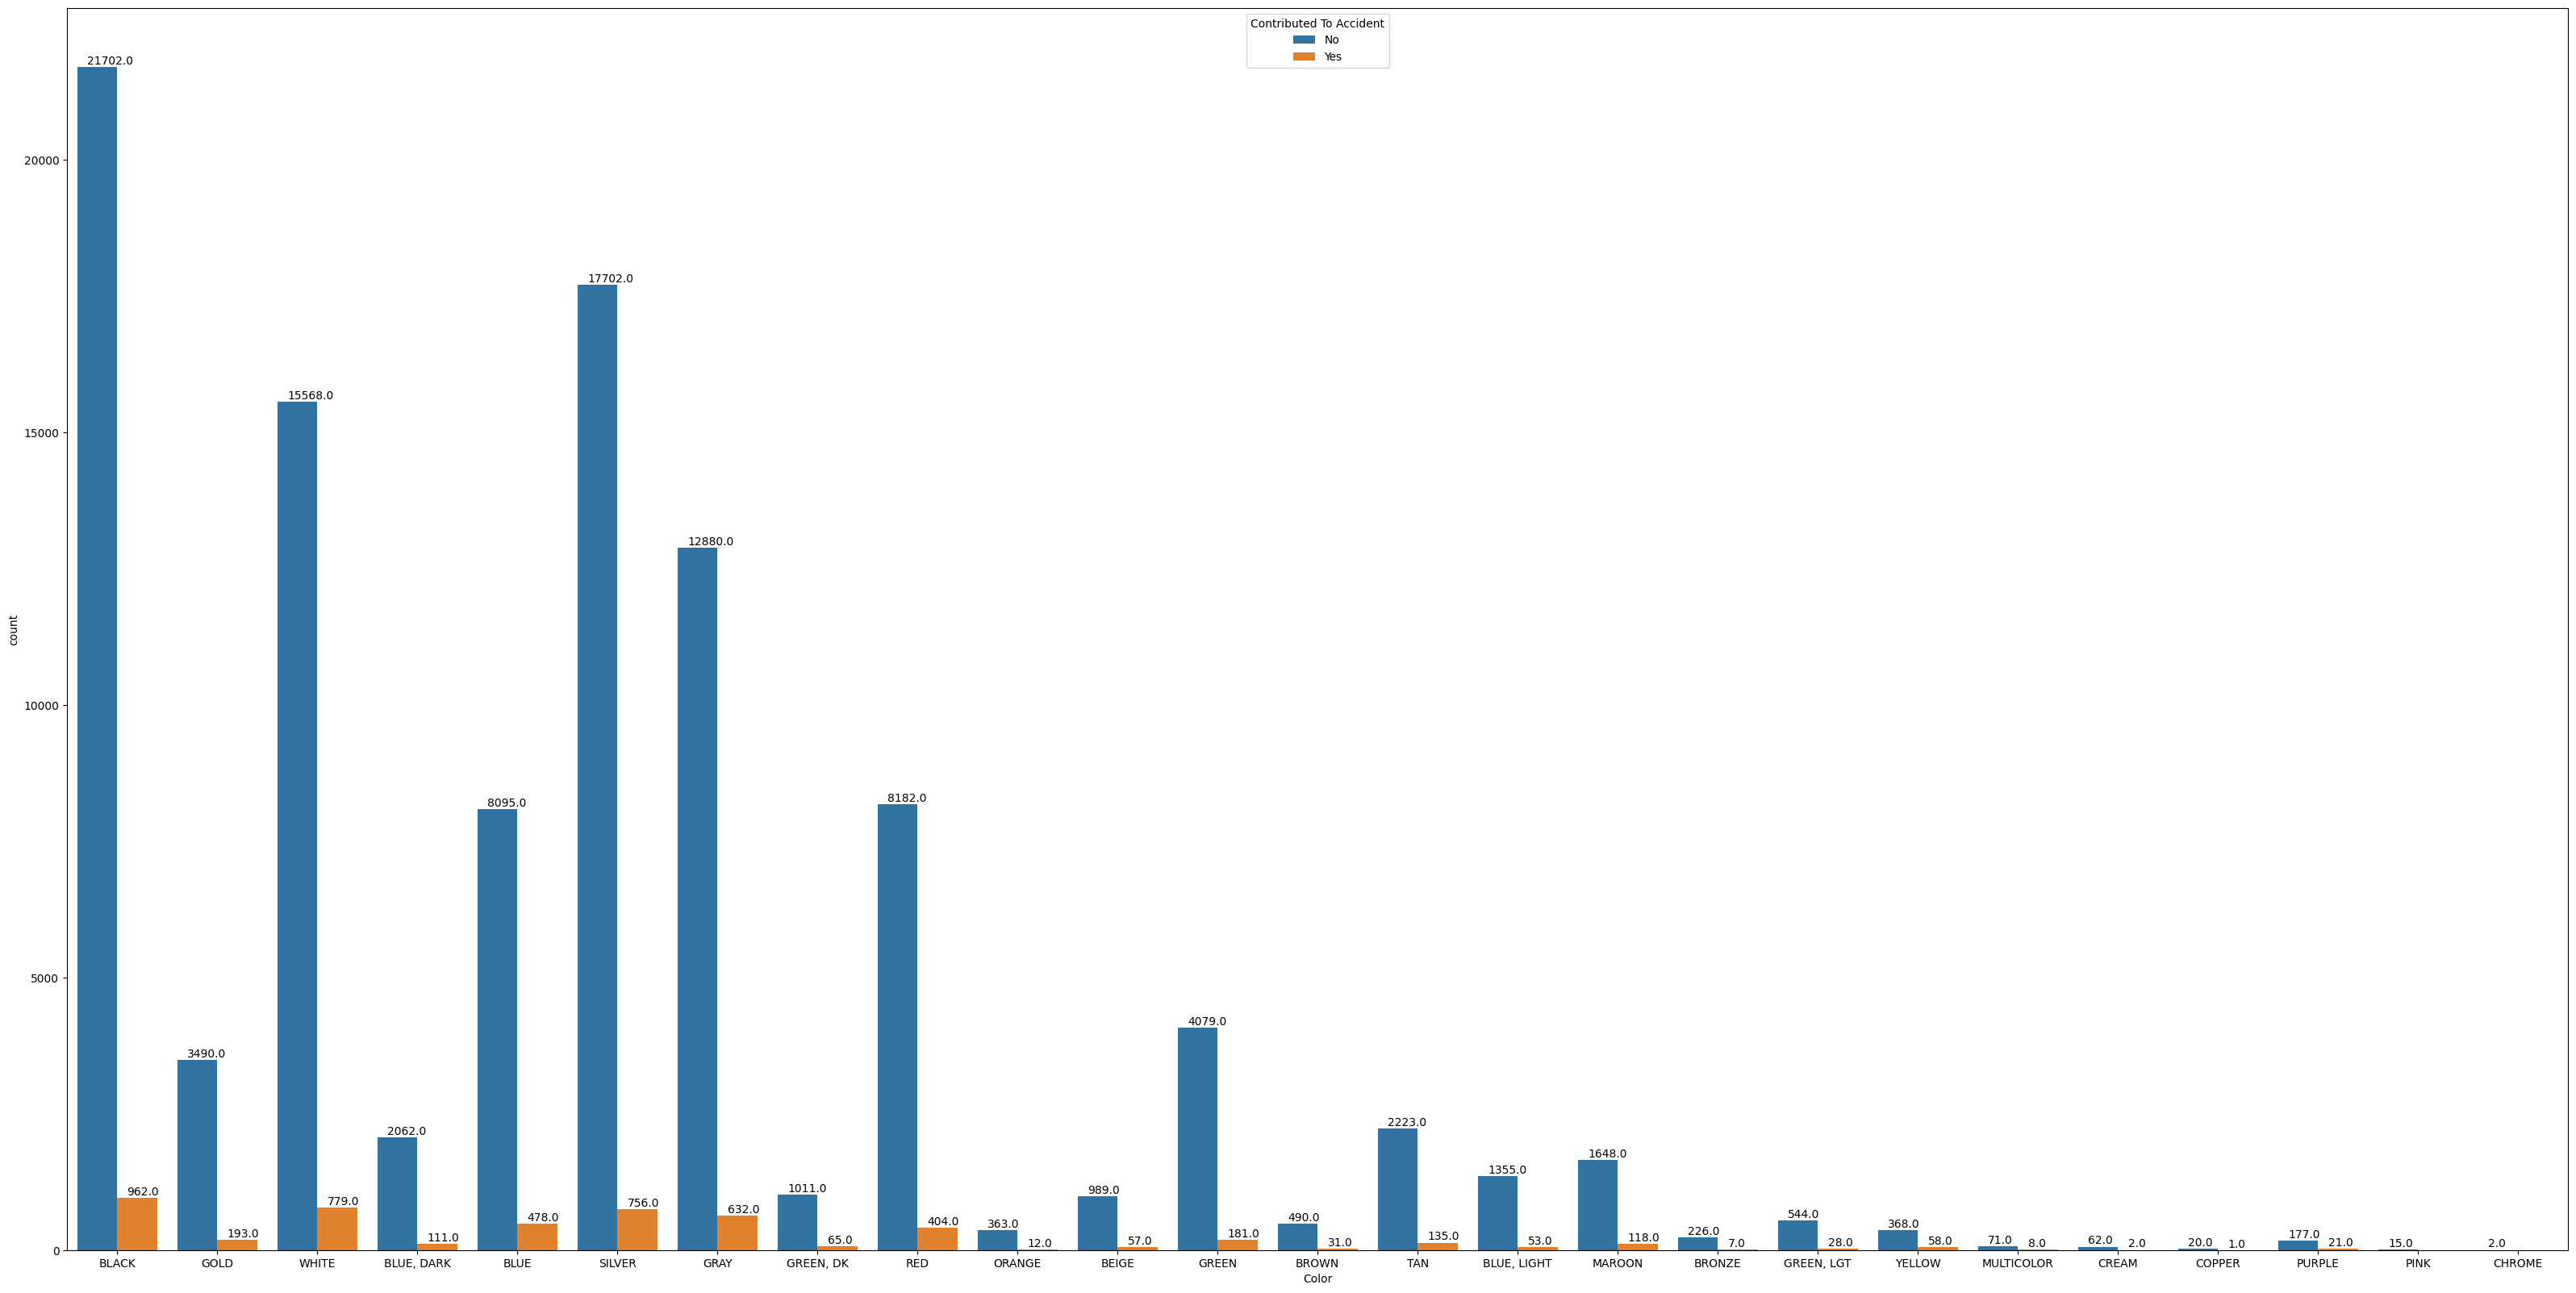

In [146]:
fig, axs = plt.subplots(1, 1, figsize=(40,20))
ax1=sns.countplot(finalDF_cleaned['Color'], hue=finalDF_cleaned['Contributed To Accident'])
i=0
n=[]
y=[]
for p in ax1.patches:
  ax1.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
  k=0
  
  if i<25:
    k=(p.get_height())
    n.append(k)
    i+=1
  else:
    k=(p.get_height())
    y.append(k)
    i+=1
ratio=[]
for i in range(25):
  ratio.append(y[i]/(y[i]+n[i]))


Filtering the records indicating fatalities, and visualizing them against the vehicle type. We can see that automobiles have a higher rate of fatalities, whereas station wagons (a much heavy and stronger vehicle) have had very less fatal cases. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


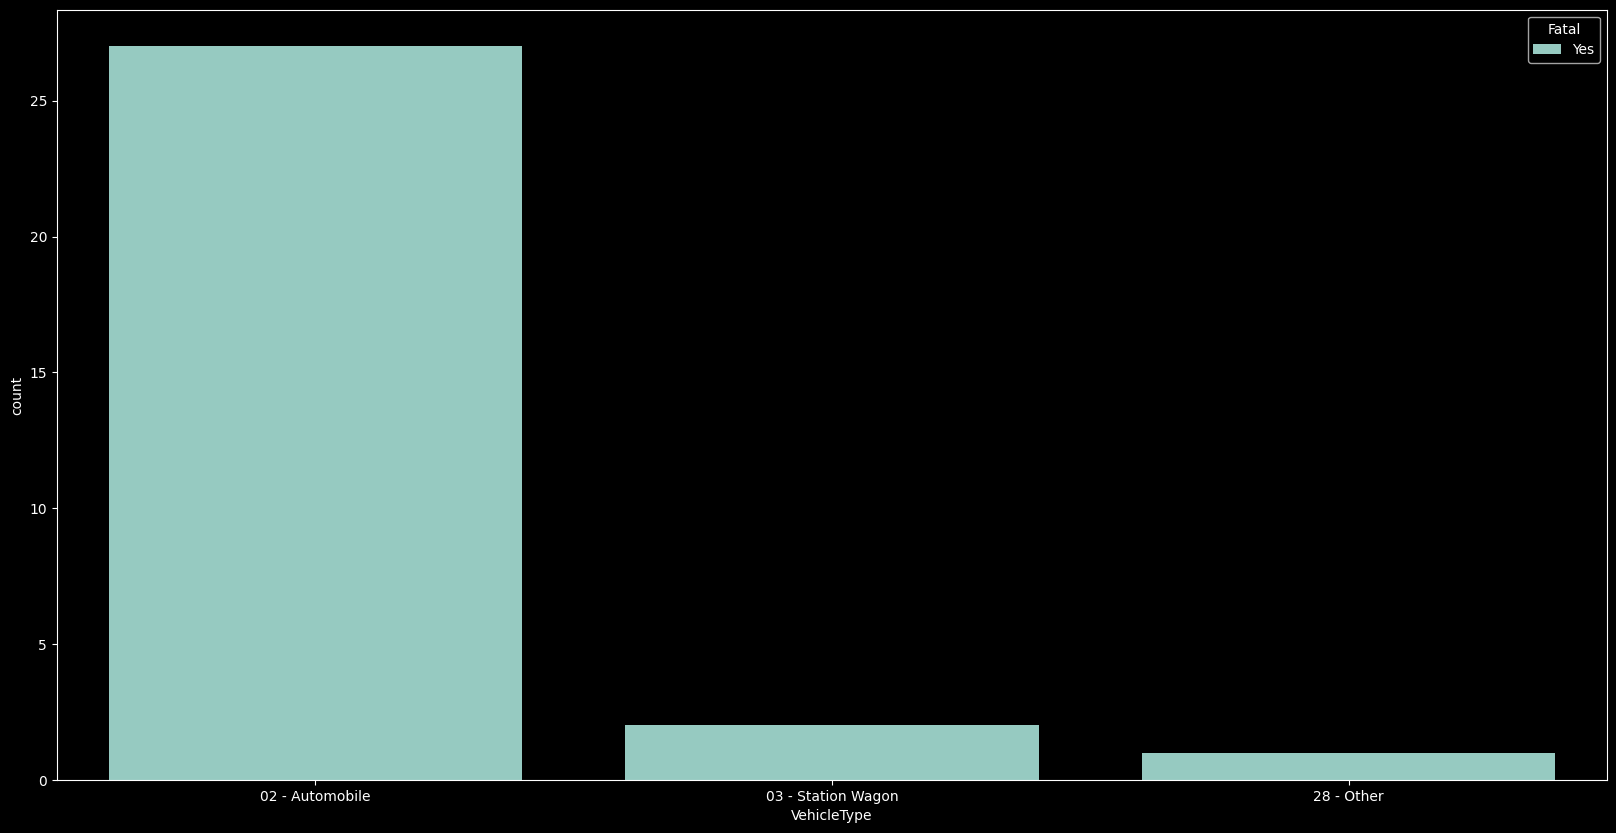

In [ ]:
filtered_df_fatals = finalDF_cleaned.loc[(finalDF_cleaned['Fatal'] == 'Yes')]

fig, axs = plt.subplots(1, 1, figsize=(20,10))
ax1=sns.countplot(filtered_df_fatals['VehicleType'], hue=filtered_df_fatals['Fatal'])


In [ ]:
import math
def phicorr(attr1, attr2):
    n00=0
    n01=0
    n10=0
    n11=0
    for i in range(attr1.shape[0]):
      if attr1.iloc[i]==0 and attr2.iloc[i]==0:
          n00+=1
      elif attr1.iloc[i]==0 and attr2.iloc[i]==1:
          n01+=1
      elif attr1.iloc[i]==1 and attr2.iloc[i]==0:
          n10+=1
      elif attr1.iloc[i]==1 and attr2.iloc[i]==1:
          n11+=1
    nx0=n00+n01
    nx1=n10+n11
    ny0=n00+n10
    ny1=n01+n11
    k=nx0*nx1*ny0*ny1
    x=n11*n00
    y=n10*n01
    return (x-y)/math.sqrt(k)

In [ ]:
#attr1.shape[0]

In [ ]:
a1='Belts'
a2='Personal Injury'
attr1=finalDF_cleaned['Belts']
attr2=finalDF_cleaned['Personal Injury']
ans=phicorr(attr1,attr2)
ans

0.1563794322855948

In [ ]:
def pointbi(attr1,attr2): #attr1 is the dichotomous variable and attr2 is the continuous variable
    variable1=[]
    variable0=[]
    for i in range(attr1.shape[0]):
        if attr1.iloc[i] == 1:
            variable1.append(attr2.iloc[i])
        elif attr1.iloc[i] == 0:
            variable0.append(attr2.iloc[i])
    sx=attr2.std()
    x0=sum(variable0)/len(variable0)
    x1=sum(variable1)/len(variable1)
    n0=len(variable0)
    n1=len(variable1)
    n=n0+n1
    z=x1-x0/sx
    k=math.sqrt((n0*n1)/(n*(n-1)))
    return (x1-x0)*k/sx

In [ ]:
finalDF_cleaned.iloc[:,20]=labenc.fit_transform(finalDF_cleaned.iloc[:,20].values)
b1='Personal Injury'
b2='Make'
attrb1=finalDF_cleaned['Personal Injury']
attrb2=finalDF_cleaned['Make']
ans2=pointbi(attrb1, attrb2)
ans2

-0.008188913223469207

In [ ]:
finalDF_cleaned.corr()

,Unnamed: 0,Belts,Personal Injury,Alcohol,Year,Make
Unnamed: 0,1.000000,0.005631,-0.079394,-0.033628,-0.001567,0.002769
Belts,0.005631,1.000000,0.156379,-0.109619,0.008088,-0.001431
Personal Injury,-0.079394,0.156379,1.000000,0.006243,-0.001210,-0.008189
Alcohol,-0.033628,-0.109619,0.006243,1.000000,-0.025312,-0.004087
Year,-0.001567,0.008088,-0.001210,-0.025312,1.000000,-0.005161
Make,0.002769,-0.001431,-0.008189,-0.004087,-0.005161,1.000000


Time series analysis

In [30]:
ts_data=pd.DataFrame(finalDF_cleaned['Date Of Stop'])
ts_data.columns=['Date']
ts_data['Accident']=1

ts_data['Date']=pd.to_datetime(ts_data.Date)

ts_data=ts_data.sort_values(by='Date')
ts_data=ts_data.reset_index(drop=True)

In [31]:

ts_data.head()

,Date,Accident
0,2012-01-01,1
1,2012-01-01,1
2,2012-01-01,1
3,2012-01-01,1
4,2012-01-01,1


In [32]:
ts_data.tail()

,Date,Accident
108411,2018-04-25,1
108412,2018-04-25,1
108413,2018-04-25,1
108414,2018-04-25,1
108415,2018-04-25,1


In [33]:
#ANALYSING MONTH WISE
ts_data=ts_data.resample('M', on='Date').sum()

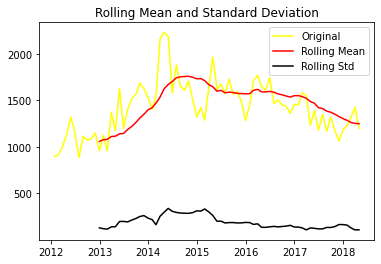

Results of dickey fuller test
Test Statistics                -2.803609
p-value                         0.057760
No. of lags used                1.000000
Number of observations used    74.000000
critical value (1%)            -3.521980
critical value (5%)            -2.901470
critical value (10%)           -2.588072
dtype: float64


In [34]:
#Augmented Dickey Fuller test - testing for stationarity
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='yellow',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(ts_data['Accident'])

The null hypothesis of the ADF test is that the time series is non-stationary. In our case, if P Value > 0.05. Thus the series needs differencing.


<function matplotlib.pyplot.show>

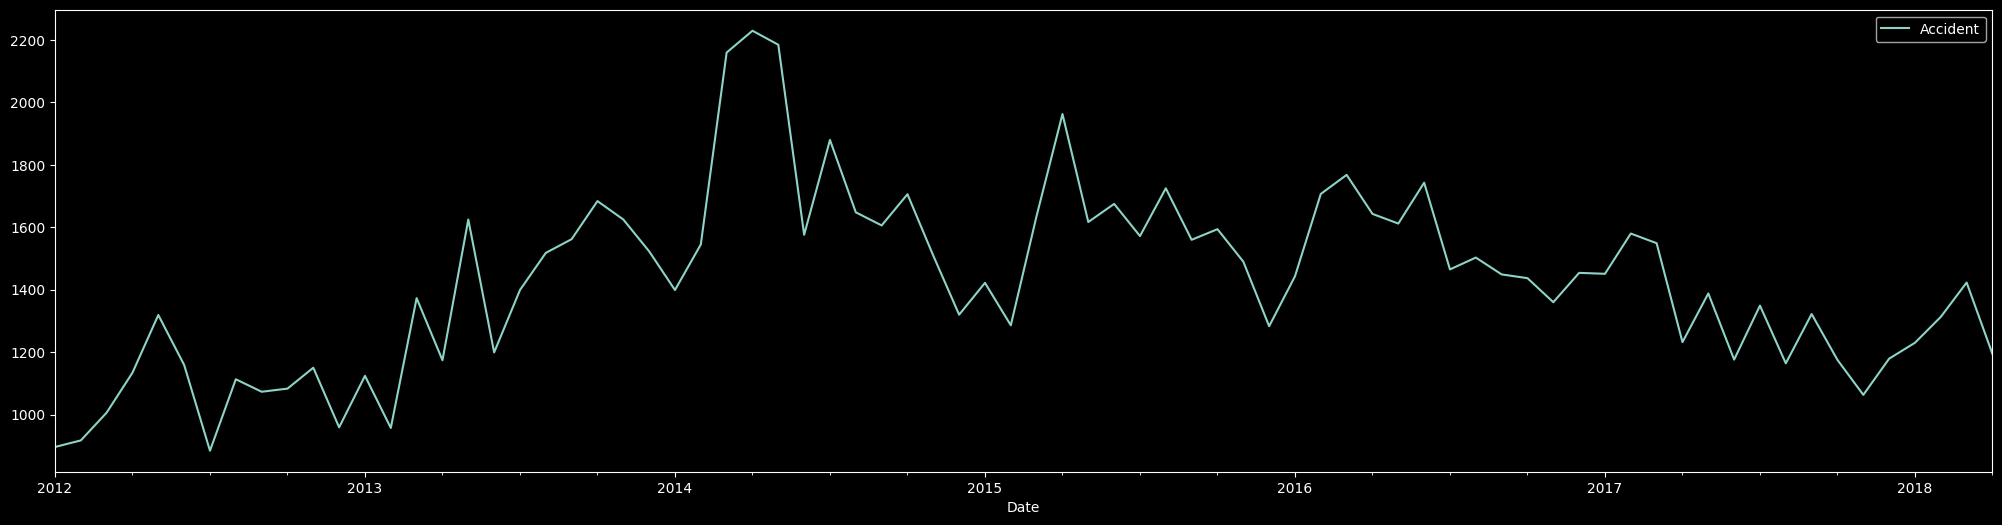

In [ ]:
import matplotlib.pyplot as plt

ts_data.plot(figsize=(25, 6))
plt.show

In [ ]:

#Checking the trend (overall changes)
ts_data_cumulative=ts_data.cumsum()
ts_data_cumulative.head()

,Accident
Date,
2012-01-31,896
2012-02-29,1813
2012-03-31,2819
2012-04-30,3953
2012-05-31,5272


<function matplotlib.pyplot.show>

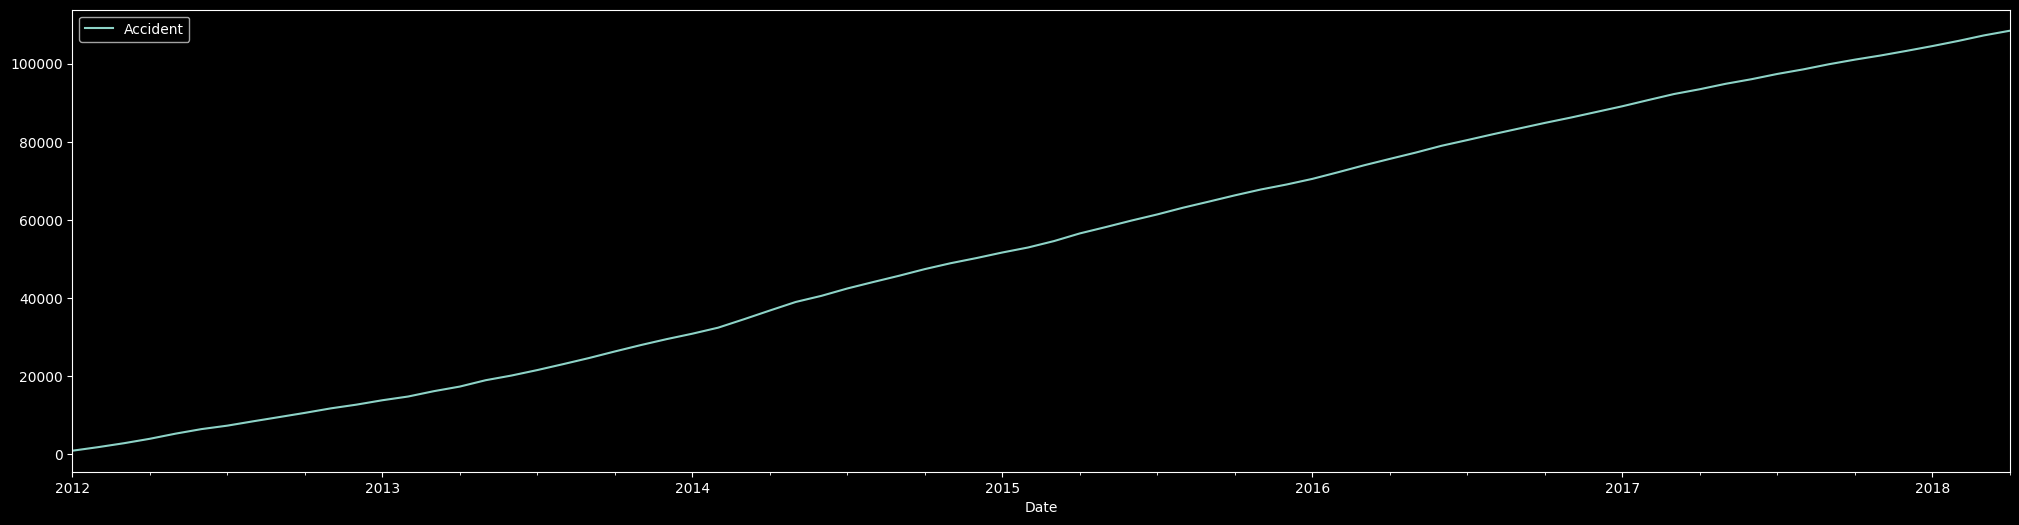

In [ ]:
ts_data_cumulative.plot(figsize=(25, 6))
plt.show

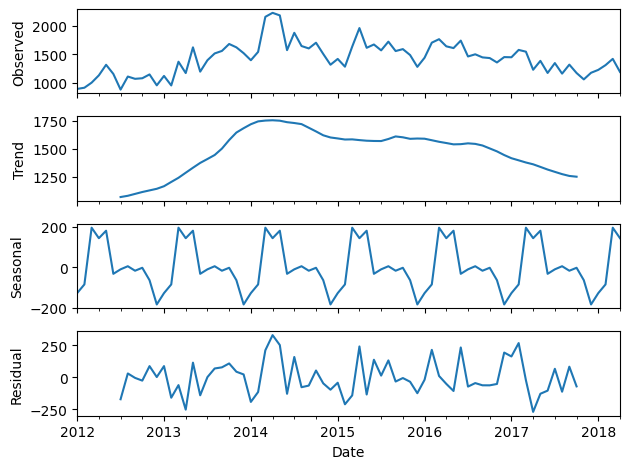

In [35]:
#time series decomposition
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
plt.style.use('default')

result = seasonal_decompose(ts_data, model='additive', freq=12)
result.plot()
pyplot.show()

In [36]:
X=ts_data['Accident'].values
size= int(len(X)*0.75)
train, test = X[0:size], X[size:len(X)]
history= [x for x in train]
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
#forecasting using ARIMA

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error

In [37]:
import warnings
warnings.filterwarnings("ignore")

In [38]:
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMSA%s MSE=%.3f' % (best_cfg, best_score))

In [39]:
# evaluating parameters - grid searching
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(ts_data.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=35776.295
ARIMA(0, 0, 1) MSE=25718.346
ARIMA(0, 0, 2) MSE=18508.523
ARIMA(0, 1, 0) MSE=21277.021
ARIMA(0, 1, 1) MSE=17793.209
ARIMA(0, 1, 2) MSE=18484.163
ARIMA(0, 2, 0) MSE=61641.270
ARIMA(0, 2, 1) MSE=21249.868
ARIMA(1, 0, 0) MSE=17530.436
ARIMA(1, 0, 1) MSE=15861.873
ARIMA(1, 0, 2) MSE=16201.634
ARIMA(1, 1, 0) MSE=17566.600
ARIMA(1, 1, 1) MSE=19634.059
ARIMA(1, 2, 0) MSE=31437.040
ARIMA(1, 2, 1) MSE=17488.052
ARIMA(2, 0, 0) MSE=15551.656
ARIMA(2, 0, 1) MSE=15401.385
ARIMA(2, 0, 2) MSE=15601.276
ARIMA(2, 1, 0) MSE=17725.828
ARIMA(2, 1, 1) MSE=23002.757
ARIMA(2, 2, 0) MSE=28169.627
Best ARIMSA(2, 0, 1) MSE=15401.385


In [ ]:
#Best model - > 2,0,1

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   76
Model:                     ARMA(2, 1)   Log Likelihood                -505.304
Method:                       css-mle   S.D. of innovations            185.530
Date:                Sun, 05 Dec 2021   AIC                           1020.609
Time:                        11:06:28   BIC                           1032.262
Sample:                             0   HQIC                          1025.266
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1386.3782    102.659     13.505      0.000    1185.169    1587.587
ar.L1.y        0.1802      0.276      0.654      0.515      -0.360       0.720
ar.L2.y        0.5364      0.203      2.639      0.0

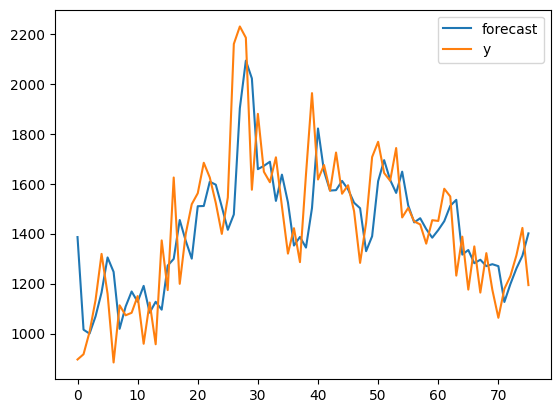

In [40]:
X=ts_data['Accident'].values

model = ARIMA(X, order=(2,0,1)) 
model_fit = model.fit()
print(model_fit.summary())

model_fit.plot_predict(dynamic=False)
plt.show()

In [ ]:
X=ts_data
size= int(len(X)*0.75)
print(size)
train, test = X[0:size], X[size:len(X)]
history= [x for x in train]

57


In [41]:
import itertools
import statsmodels.api as sm

### Define Parameter Ranges to Test ###

# Note: higher numbers will result in code taking much longer to run
# Here we have it set to test p,d,q each = 0, 1 & 2

# Define the p, d and q parameters to take any value between 0 and 3 (exclusive)
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
# Note: here we have 12 in the 's' position as we have monthly data
# You'll want to change this according to your time series' frequency
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

### Run Grid Search ###

# Note: this code will take a while to run

# Define function
def sarimax_gridsearch(ts, pdq, pdqs, maxiter=50, freq='M'):
    '''
    Input: 
        ts : your time series data
        pdq : ARIMA combinations from above
        pdqs : seasonal ARIMA combinations from above
        maxiter : number of iterations, increase if your model isn't converging
        frequency : default='M' for month. Change to suit your time series frequency
            e.g. 'D' for day, 'H' for hour, 'Y' for year. 
        
    Return:
        Prints out top 5 parameter combinations
        Returns dataframe of parameter combinations ranked by BIC
    '''

    # Run a grid search with pdq and seasonal pdq parameters and get the best BIC value
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(ts, # this is your time series you will input
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False,
                                                freq=freq)

                output = mod.fit(maxiter=maxiter) 
                #print(output)
                #break
                ans.append([comb, combs, output.bic, output.aic])
                print('SARIMAX {} x {}12 : BIC Calculated ={} : AIC Calculated ={}'.format(comb, combs, output.bic, output.aic))
            except:
                continue
            
    # Find the parameters with minimal BIC value

    # Convert into dataframe
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'bic', 'aic'])

    # Sort and return top 5 combinations
    ans_df = ans_df.sort_values(by=['bic'],ascending=True)[0:5]
    
    return ans_df
    
### Apply function to your time series data ###

# Remember to change frequency to match your time series data
sarimax_gridsearch(ts_data, pdq, pdqs, freq='M')

SARIMAX (0, 0, 0) x (0, 0, 0, 12)12 : BIC Calculated =1310.18532109063 : AIC Calculated =1307.8678329770937
SARIMAX (0, 0, 0) x (0, 0, 1, 12)12 : BIC Calculated =1045.863320585464 : AIC Calculated =1041.577051132681
SARIMAX (0, 0, 0) x (0, 0, 2, 12)12 : BIC Calculated =2192.8671000522845 : AIC Calculated =2187.0716231541114
SARIMAX (0, 0, 0) x (0, 1, 0, 12)12 : BIC Calculated =916.2199044156324 : AIC Calculated =914.0767696892409
SARIMAX (0, 0, 0) x (0, 1, 1, 12)12 : BIC Calculated =741.1652119810997 : AIC Calculated =737.301560715651
SARIMAX (0, 0, 0) x (0, 2, 0, 12)12 : BIC Calculated =780.6244334774763 : AIC Calculated =778.6926078447519
SARIMAX (0, 0, 0) x (0, 2, 1, 12)12 : BIC Calculated =588.3647654131752 : AIC Calculated =585.0376421209158
SARIMAX (0, 0, 0) x (1, 0, 0, 12)12 : BIC Calculated =934.2654681485792 : AIC Calculated =929.9477019818598
SARIMAX (0, 0, 0) x (1, 0, 1, 12)12 : BIC Calculated =932.1628234947976 : AIC Calculated =925.733419315623
SARIMAX (0, 0, 0) x (1, 0, 2

,pdq,pdqs,bic,aic
545,"(2, 2, 1)","(2, 2, 1, 12)",338.248947,330.002570
524,"(2, 2, 0)","(2, 2, 1, 12)",341.649963,334.581640
544,"(2, 2, 1)","(2, 2, 0, 12)",346.373420,339.305097
565,"(2, 2, 2)","(2, 2, 0, 12)",349.056023,340.809646
523,"(2, 2, 0)","(2, 2, 0, 12)",350.659739,344.769470


Order of differencing is taken as 2.

In [ ]:
#differencing and plotting

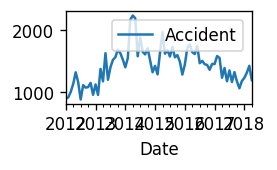

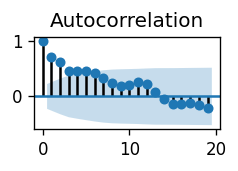

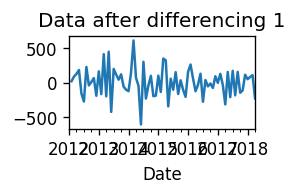

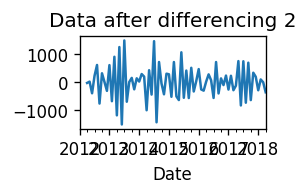

In [ ]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plt.rcParams.update({'figure.figsize':(2,1), 'figure.dpi':120})

ts_plots=pd.DataFrame()
ts_plots['Accident']=ts_data['Accident']
ts_plots.plot()
plot_acf(ts_plots['Accident'])
plt.show()

#order 1 differencing
x=ts_plots.diff()
x['Accident'].plot()
plt.title('Data after differencing 1')
plt.show()

#order 2 differencing
y=x.diff()
y['Accident'].diff().plot()
plt.title('Data after differencing 2')
plt.show()

pyplot.show()

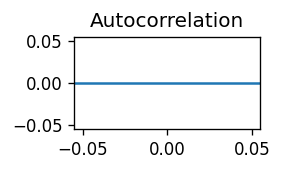

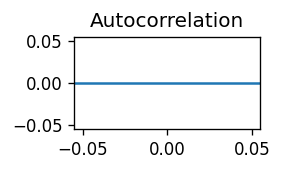

In [ ]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(x['Accident'])
plot_acf(y['Accident'])
pyplot.show()

                                 Statespace Model Results                                 
Dep. Variable:                           Accident   No. Observations:                   76
Model:             SARIMAX(2, 2, 1)x(2, 2, 1, 12)   Log Likelihood                -158.001
Date:                            Sun, 05 Dec 2021   AIC                            330.003
Time:                                    12:13:59   BIC                            338.249
Sample:                                01-31-2012   HQIC                           332.190
                                     - 04-30-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4174      0.485     -0.861      0.389      -1.368       0.533
ar.L2         -0.0389      0.307   

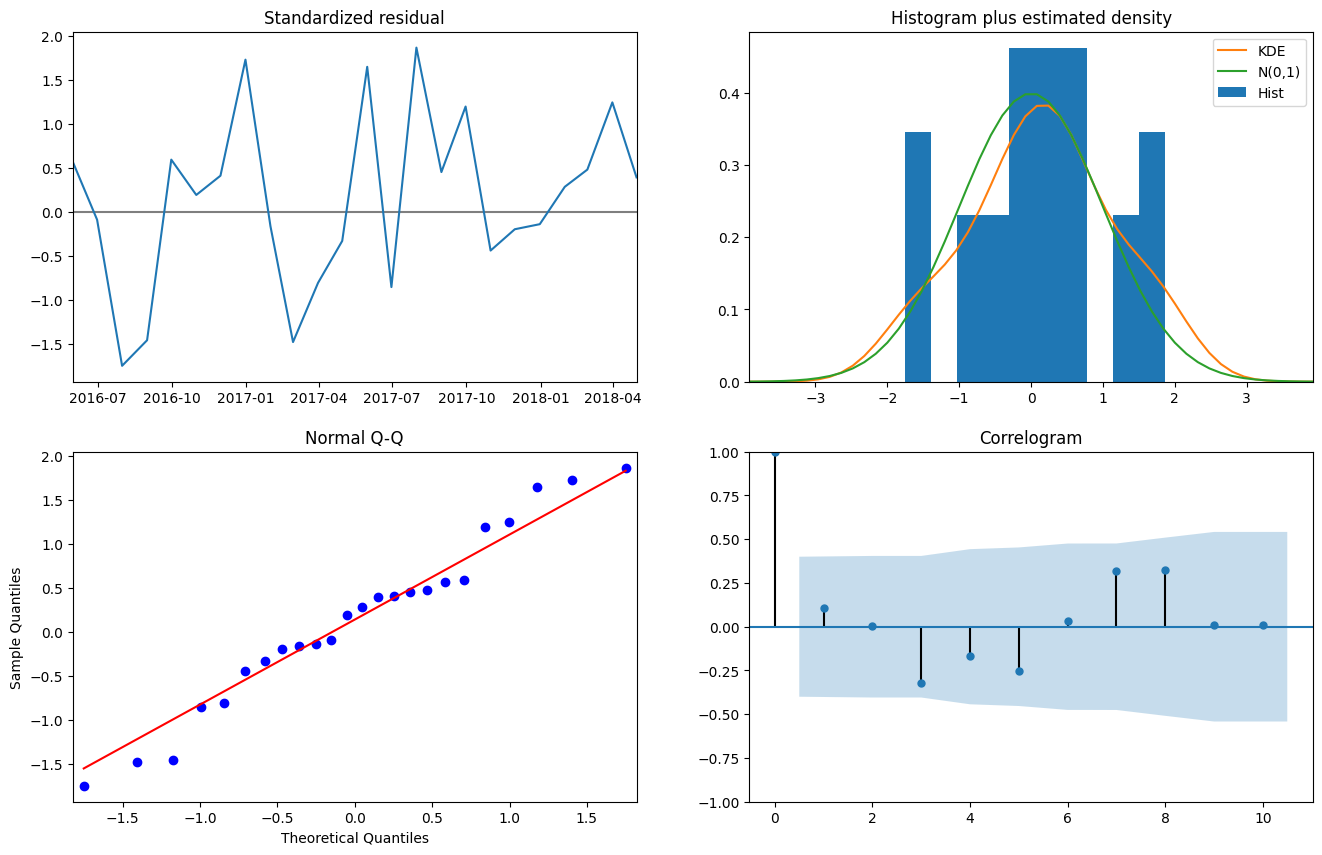

In [61]:
import warnings
warnings.filterwarnings("ignore")

X=ts_data
size= int(len(X)*0.75)
train, test = X[0:size], X[size:len(X)]
sarimax = sm.tsa.statespace.SARIMAX(ts_data, 
                                    order=(2,2,1), 
                                    seasonal_order=(2,2,1,12), 
                                    enforce_stationarity=False, 
                                    enforce_invertibility=False,
                                    freq='M')
                                    
# Fit the model
output = sarimax.fit()
    
# Print output summary
print(output.summary())

# Plot diagnostics
output.plot_diagnostics(figsize=(16,10));

In [ ]:
!pip install statsmodels==0.11.0

In [81]:
output = sarimax.fit()

In [96]:
predictions = output.get_prediction(start=pd.to_datetime('2017-08-31'), dynamic=False)
pred_confidence_intervals = predictions.conf_int()

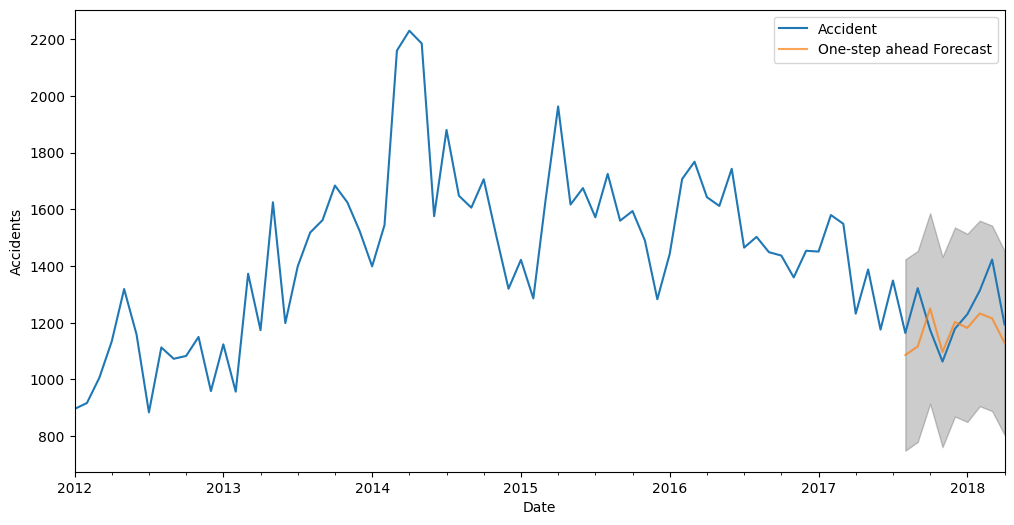

In [97]:
ax = ts_data['2012':].plot(label='observed')
predictions.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7,figsize=(12, 6))

ax.fill_between(pred_confidence_intervals.index,
                pred_confidence_intervals.iloc[:, 0],
                pred_confidence_intervals.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Accidents')
plt.legend()

plt.show()

In [99]:
y_forecasted = pd.DataFrame(predictions.predicted_mean)

y_truth = ts_data['2017-08-31':]
y_truth = y_truth.astype(float)

from math import sqrt
mse = np.mean(np.abs((y_truth.values - y_forecasted.values) / y_truth.values)) * 100
print('The Mean Absolute Percentage Error of our forecasts is', round(mse, 2))

The Mean Absolute Percentage Error of our forecasts is 7.1


In [94]:
predictions = output.get_prediction(start=pd.to_datetime('2017-08-31'), dynamic=False)
#print(predictions.predicted_mean)
test = ts_data['2017-08-31':]
maep = mean_absolute_percentage_error(test, predictions.predicted_mean)
print('Test MAEP: %.3f' % maep)

Test MAEP: 0.071


In [46]:
pred_uc = output.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()


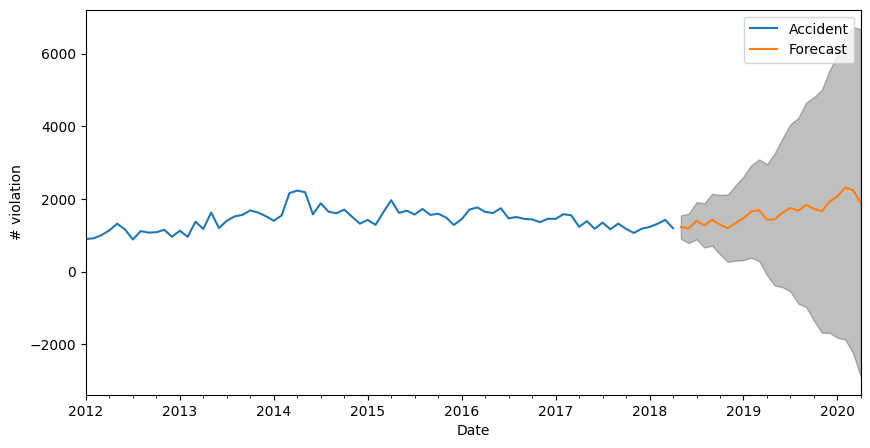

In [103]:
ax = ts_data.plot(label='observed', figsize=(10, 5))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('# violation')

plt.legend()
plt.show()

In [48]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 35.7 MB/s 
     |████████████████████████████████| 9.8 MB 35.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


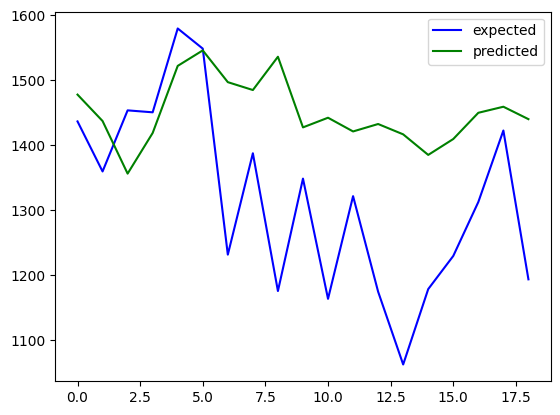

In [49]:
#using auto arima
import pmdarima as pm

model = pm.auto_arima(train, seasonal=True, m=12)
forecasts = model.predict(test.shape[0])
x = np.arange(test.shape[0])
plt.plot(x, test, c='blue' , label = 'expected')
plt.plot(x, forecasts, c='green' , label = 'predicted')
plt.legend()
plt.show()

predicted=1275.245444, expected=1322.000000
predicted=1278.925024, expected=1175.000000
predicted=1277.752013, expected=1063.000000
predicted=1121.627055, expected=1179.000000
predicted=1197.104377, expected=1230.000000
predicted=1260.635562, expected=1313.000000
predicted=1312.957586, expected=1423.000000
predicted=1404.486078, expected=1194.000000
Test RMSE: 123.812
Test MAEP: 0.087


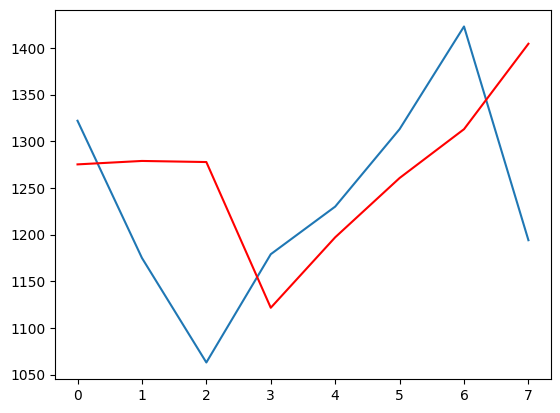

In [100]:
# evaluate an ARIMA model with parameters obtained on grid searching
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

# split into train and test sets
X = ts_data.values
size = int(len(X) * 0.90)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(2,0,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
maep = mean_absolute_percentage_error(test, predictions)
print('Test RMSE: %.3f' % rmse)
print('Test MAEP: %.3f' % maep)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()